
## Data Description & Context:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

## Domain:
Medicine
   

## Attribute Information:
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency 

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S himmer:DDA - Several measures of variation in amplitude


NHR,HNR - Two measures of ratio of noise to tonal components in the voice 

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)


## Objective:

Goal is to classify the patients into the respective labels using the attributes from their voice recordings
Steps and tasks:
1. Loadthedataset

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset.
Mention a few comments in this regard (5 points)
3. Using univariate & bivariate analysis to check the individual attributes for
their basic statistics such as central values, spread, tails, relationships
between variables etc. mention your observations (15 points)
4. Splitthedatasetintotrainingandtestsetintheratioof70:30
(Training:Test) (5 points)
5. Prepare the data for training - Scale the data if necessary, get rid of missing
values (if any) etc (5 points)
6. Trainatleast3standardclassificationalgorithms-LogisticRegression,
Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test
data (10 points)
7. Train a meta-classifier and note the accuracy on test data (10 points)
8. TrainatleastonestandardEnsemblemodel-Randomforest,Bagging,
Boosting etc, and note the accuracy (10 points)
9. Compare all the models (minimum 5) and pick the best one among them
(10 points)

In [1]:
import numpy as np # for dataframe handling
import pandas as pd #array handling
import seaborn as sns # plotting
sns.set(color_codes=True)
import matplotlib.pyplot as plt # plotting
%matplotlib inline
# For preprocessing the data

from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn import metrics
# To model the Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



### Reading the data

In [2]:
data=pd.read_csv('Data - Parkinsons.txt')

In [3]:
data.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

From the above table I found that the Target Column(Status) is in the middle of DataFrame . For More convenience I am rearanging the Targeted Column to the Last of dataframe

In [4]:
status = data['status'] #adding status to a new dataframe
data.drop(['status'],axis=1,inplace=True)#droping status from the dataset
data['status']=status # appending Targeted Column to the Last of dataframe 
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 24 columns]

In [5]:
data.shape #no of rows and columns in the dataframe

(195, 24)

There are 195 rows and 24 Columns in the DataFrame

In [6]:
data.dtypes # to get the data type of each attributes 

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

In [7]:
data.isnull().sum() # to check the presence of missing values 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

As the counts are 0 there is no missing values in the dataframe

### Descriptive statistics of each & every column

In [8]:
data.describe().transpose() 

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   
status            195.0    0.753846   0.431878    0.000000    1.000000   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367  
status              1.000000    1.000000    1.000000

MDVP:Fhi(Hz) Contains outliers and is highly skewed

### Five Point Summary

In [9]:
summary=data.describe().T
summary[['min', '25%', '50%', '75%', 'max']]

min         25%         50%         75%         max
MDVP:Fo(Hz)        88.333000  117.572000  148.790000  182.769000  260.105000
MDVP:Fhi(Hz)      102.145000  134.862500  175.829000  224.205500  592.030000
MDVP:Flo(Hz)       65.476000   84.291000  104.315000  140.018500  239.170000
MDVP:Jitter(%)      0.001680    0.003460    0.004940    0.007365    0.033160
MDVP:Jitter(Abs)    0.000007    0.000020    0.000030    0.000060    0.000260
MDVP:RAP            0.000680    0.001660    0.002500    0.003835    0.021440
MDVP:PPQ            0.000920    0.001860    0.002690    0.003955    0.019580
Jitter:DDP          0.002040    0.004985    0.007490    0.011505    0.064330
MDVP:Shimmer        0.009540    0.016505    0.022970    0.037885    0.119080
MDVP:Shimmer(dB)    0.085000    0.148500    0.221000    0.350000    1.302000
Shimmer:APQ3        0.004550    0.008245    0.012790    0.020265    0.056470
Shimmer:APQ5        0.005700    0.009580    0.013470    0.022380    0.079400
MDVP:APQ            0.007190    0.013080    0.018260    0.029400    0.137780
Shimmer:DDA         0.013640    0.024735    0.038360    0.060795    0.169420
NHR                 0.000650    0.005925    0.011660    0.025640    0.314820
HNR                 8.441000   19.198000   22.085000   25.075500   33.047000
RPDE                0.256570    0.421306    0.495954    0.587562    0.685151
DFA                 0.574282    0.674758    0.722254    0.761881    0.825288
spread1            -7.964984   -6.450096   -5.720868   -5.046192   -2.434031
spread2             0.006274    0.174351    0.218885    0.279234    0.450493
D2                  1.423287    2.099125    2.361532    2.636456    3.671155
PPE                 0.044539    0.137451    0.194052    0.252980    0.527367
status              0.000000    1.000000    1.000000    1.000000    1.000000

## Univariate  Analysis

#### Skewness

In [10]:
data.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
status             -1.187727
dtype: float64

Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left

### Average vocal fundamental frequency MDVP:Fo(Hz)

In [11]:

plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Fo(Hz)'], showfliers=True).set_title("Distribution of 'MDVP:Fo(Hz)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Fo(Hz)'],color='g').set_title("MDVP:Fo(Hz) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Fo(Hz)'].plot.hist(color='r').set_title("MDVP:Fo(Hz) Vs Frequency");



- Average vocal fundamental frequency is Right Skewed 
- Most of the values between 110-180 Hz
- Mean and Median are almost the same 
- There are no outliers

### Maximum vocal fundamental frequency MDVP:Fhi (Hz)

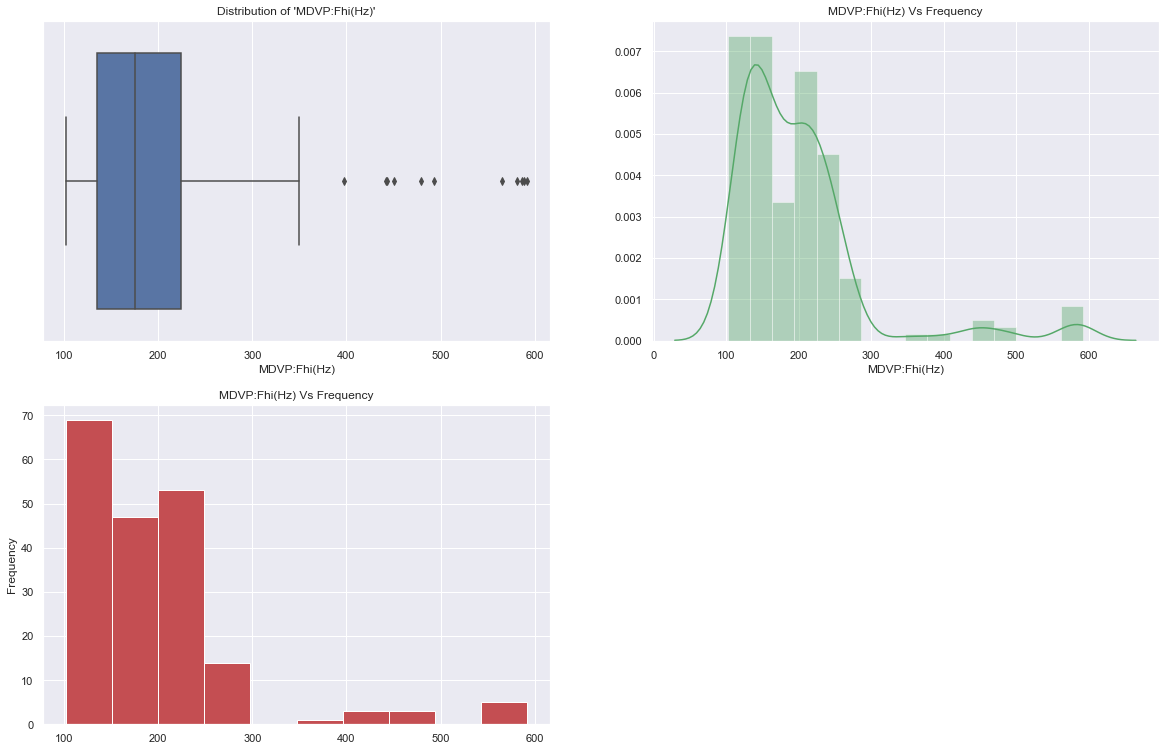

In [12]:

plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Fhi(Hz)'], showfliers=True).set_title("Distribution of 'MDVP:Fhi(Hz)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Fhi(Hz)'],color='g').set_title("MDVP:Fhi(Hz) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Fhi(Hz)'].plot.hist(color='r').set_title("MDVP:Fhi(Hz) Vs Frequency");

- Maximum vocal fundamental frequencyis Right Skewed 
- Most of the values between 100- 150Hz
- Mean and median are not the same 
- There are outliers

#### Treatment of Outliers

In [13]:
q3 = data['MDVP:Fhi(Hz)'].quantile(0.75)
q1 = data['MDVP:Fhi(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 313.5485
outliers_below : 45.51950000000002


In [14]:
print(data['MDVP:Fhi(Hz)'].loc[data['MDVP:Fhi(Hz)']>outliers_above].count())
print(data['MDVP:Fhi(Hz)'].loc[data['MDVP:Fhi(Hz)']<outliers_below].count())
print(data['MDVP:Fhi(Hz)'].loc[data['MDVP:Fhi(Hz)']>outliers_above])

12
0
16     349.259
73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64


In [15]:
mean_val = data['MDVP:Fhi(Hz)'].loc[data['MDVP:Fhi(Hz)']<=outliers_above].mean()
data['MDVP:Fhi(Hz)'] = data['MDVP:Fhi(Hz)'].mask(data['MDVP:Fhi(Hz)']>outliers_above,mean_val)
print(data['MDVP:Fhi(Hz)'].head(20))

0     157.302000
1     148.650000
2     131.111000
3     137.871000
4     141.781000
5     131.162000
6     137.244000
7     113.840000
8     132.068000
9     120.103000
10    112.240000
11    115.871000
12    159.866000
13    179.139000
14    163.305000
15    217.455000
16    177.414634
17    232.181000
18    175.829000
19    189.398000
Name: MDVP:Fhi(Hz), dtype: float64


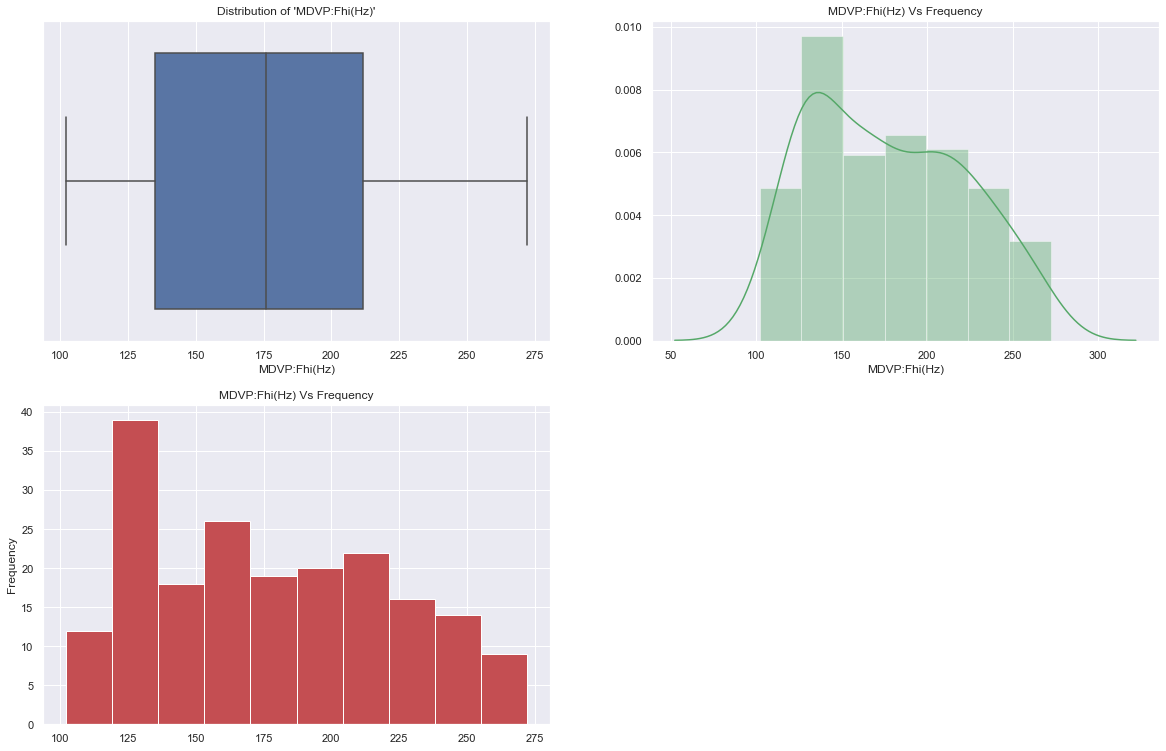

In [16]:
#Distribution after outlier treatment 

plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Fhi(Hz)'], showfliers=True).set_title("Distribution of 'MDVP:Fhi(Hz)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Fhi(Hz)'],color='g').set_title("MDVP:Fhi(Hz) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Fhi(Hz)'].plot.hist(color='r').set_title("MDVP:Fhi(Hz) Vs Frequency");

- Outliers are removed
- less no of data points are around the tail

### Minimum vocal fundamental frequency MDVP:Flo (Hz)

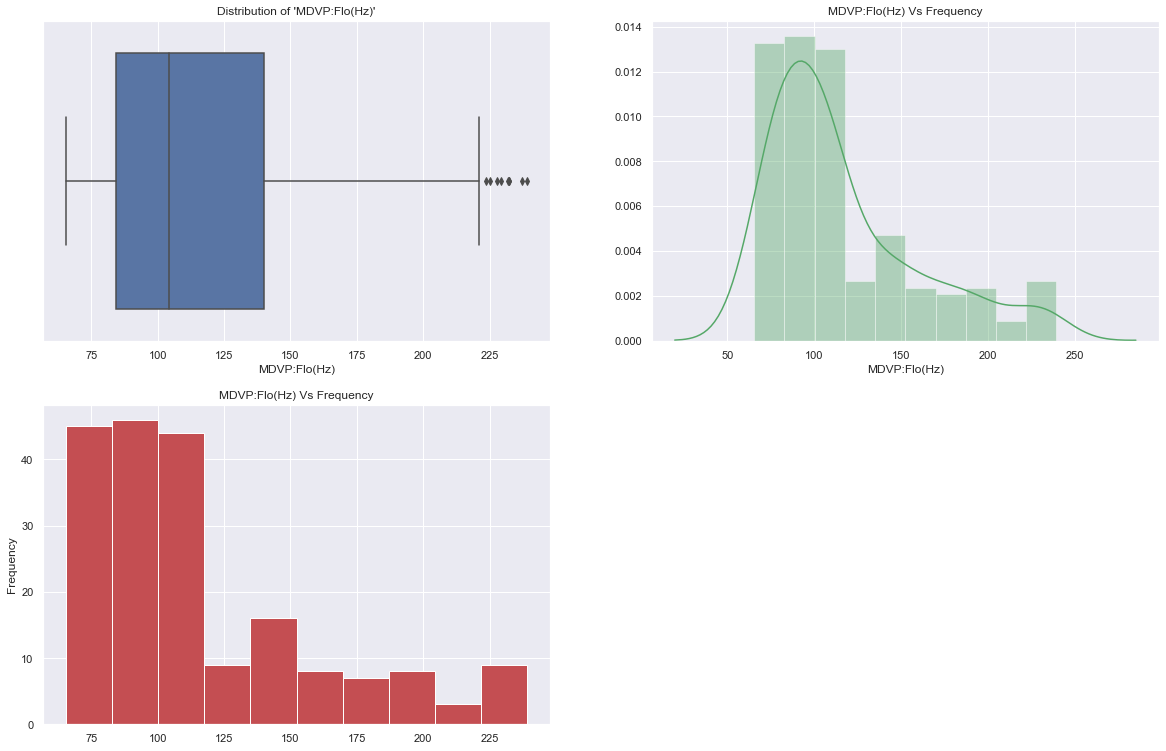

In [17]:

plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Flo(Hz)'], showfliers=True).set_title("Distribution of 'MDVP:Flo(Hz)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Flo(Hz)'],color='g').set_title("MDVP:Flo(Hz) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Flo(Hz)'].plot.hist(color='r').set_title("MDVP:Flo(Hz) Vs Frequency");

- Minimum vocal fundamental frequencyis Right Skewed 
- Most of the values between 180- 140Hz
- Mean and median are not the same 
- There are outliers

In [18]:
q3 = data['MDVP:Flo(Hz)'].quantile(0.75)
q1 = data['MDVP:Flo(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 195.74600000000004
outliers_below : 28.563499999999976


In [19]:
print(data['MDVP:Flo(Hz)'].loc[data['MDVP:Flo(Hz)']>outliers_above].count())
print(data['MDVP:Flo(Hz)'].loc[data['MDVP:Flo(Hz)']<outliers_below].count())
print(data['MDVP:Flo(Hz)'].loc[data['MDVP:Flo(Hz)']>outliers_above])

15
0
33     197.079
34     196.160
42     225.227
43     232.483
44     232.435
45     227.911
46     231.848
62     205.495
63     223.634
64     221.156
111    199.020
166    229.256
167    237.303
169    219.783
170    239.170
Name: MDVP:Flo(Hz), dtype: float64


In [20]:
max_val = data['MDVP:Flo(Hz)'].loc[data['MDVP:Flo(Hz)']<=outliers_above].max()
data['MDVP:Flo(Hz)'] = data['MDVP:Flo(Hz)'].mask(data['MDVP:Flo(Hz)']>outliers_above,max_val)

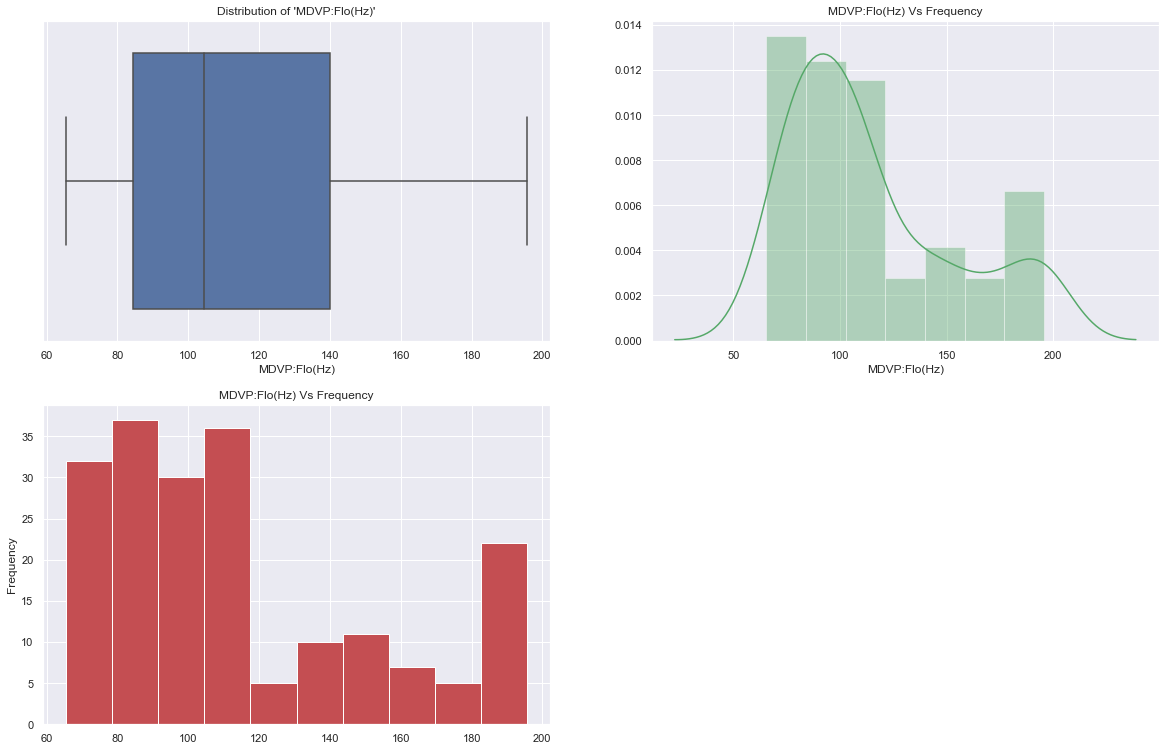

In [21]:
#Distribution after outlier treatment 
plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Flo(Hz)'], showfliers=True).set_title("Distribution of 'MDVP:Flo(Hz)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Flo(Hz)'],color='g').set_title("MDVP:Flo(Hz) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Flo(Hz)'].plot.hist(color='r').set_title("MDVP:Flo(Hz) Vs Frequency");


- There are no outliers
- Less no of datapoints aroud the tail

### Measures of variation in fundamental frequency 



### MDVP:Jitter(%)

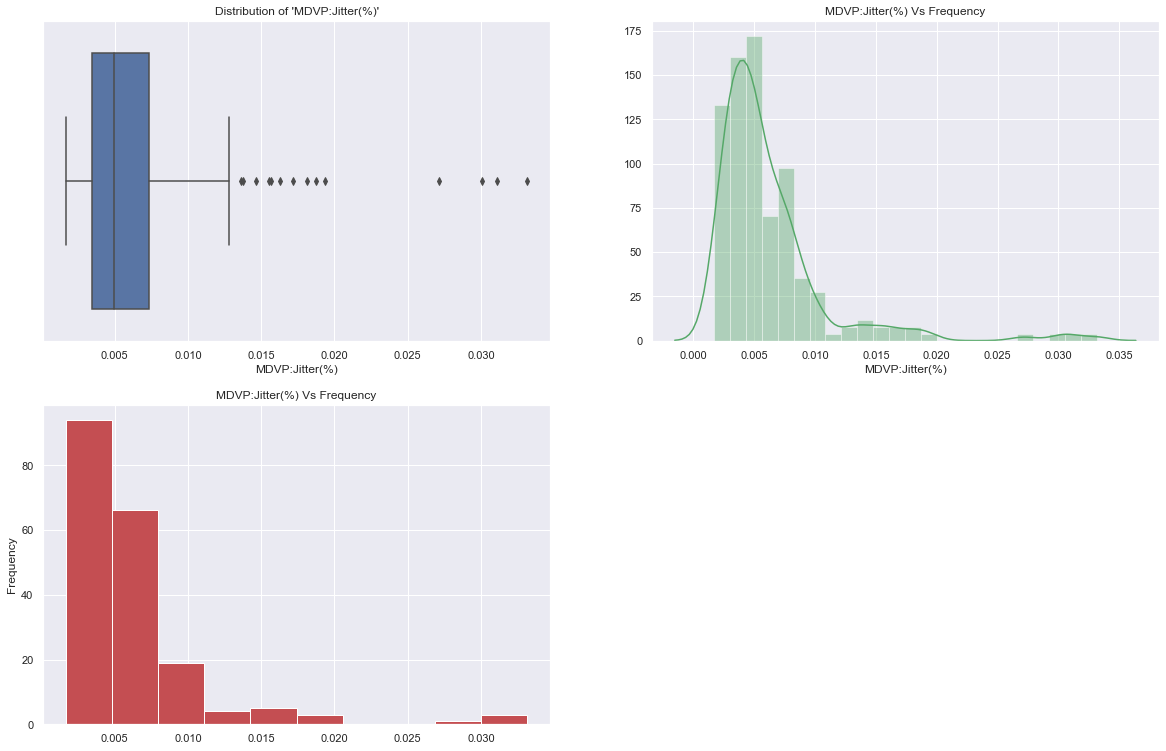

In [22]:
plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Jitter(%)'], showfliers=True).set_title("Distribution of 'MDVP:Jitter(%)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Jitter(%)'],color='g').set_title("MDVP:Jitter(%) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Jitter(%)'].plot.hist(color='r').set_title("MDVP:Jitter(%) Vs Frequency");

- MDVP:Jitter(%) is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [23]:
q3 = data['MDVP:Jitter(%)'].quantile(0.75)
q1 = data['MDVP:Jitter(%)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.01127
outliers_below : -0.0004450000000000001


In [24]:
print(data['MDVP:Jitter(%)'].loc[data['MDVP:Jitter(%)']>outliers_above].count())
print(data['MDVP:Jitter(%)'].loc[data['MDVP:Jitter(%)']<outliers_below].count())
print(data['MDVP:Jitter(%)'].loc[data['MDVP:Jitter(%)']>outliers_above])

16
0
4      0.01284
97     0.01280
98     0.01378
99     0.01936
100    0.03316
101    0.01551
102    0.03011
146    0.01568
147    0.01466
148    0.01719
149    0.01627
150    0.01872
151    0.03107
152    0.02714
157    0.01813
192    0.01360
Name: MDVP:Jitter(%), dtype: float64


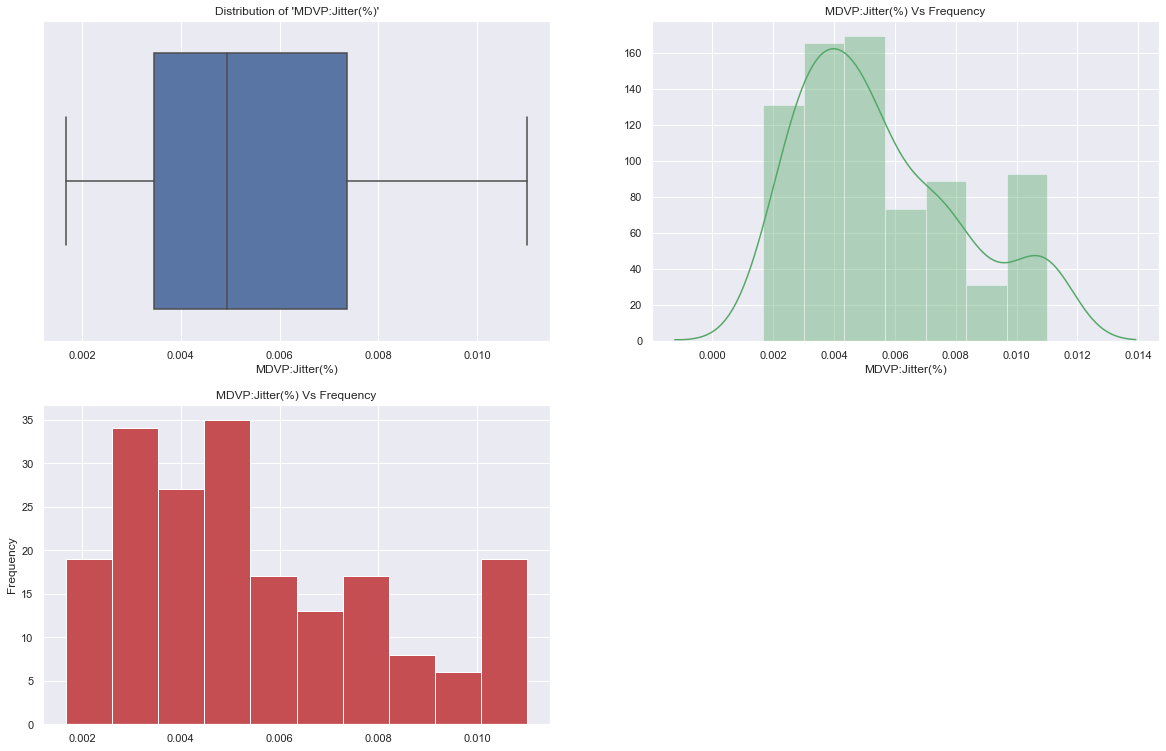

In [25]:
max_val = data['MDVP:Jitter(%)'].loc[data['MDVP:Jitter(%)']<=outliers_above].max()
data['MDVP:Jitter(%)'] = data['MDVP:Jitter(%)'].mask(data['MDVP:Jitter(%)']>outliers_above,max_val)
#distribution after outlier treatment
plt.figure(figsize= (20,20))

#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Jitter(%)'], showfliers=True).set_title("Distribution of 'MDVP:Jitter(%)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Jitter(%)'],color='g').set_title("MDVP:Jitter(%) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Jitter(%)'].plot.hist(color='r').set_title("MDVP:Jitter(%) Vs Frequency");

- Outliers are removed
- Less number of data points around the tail

### MDVP:Jitter(Abs)

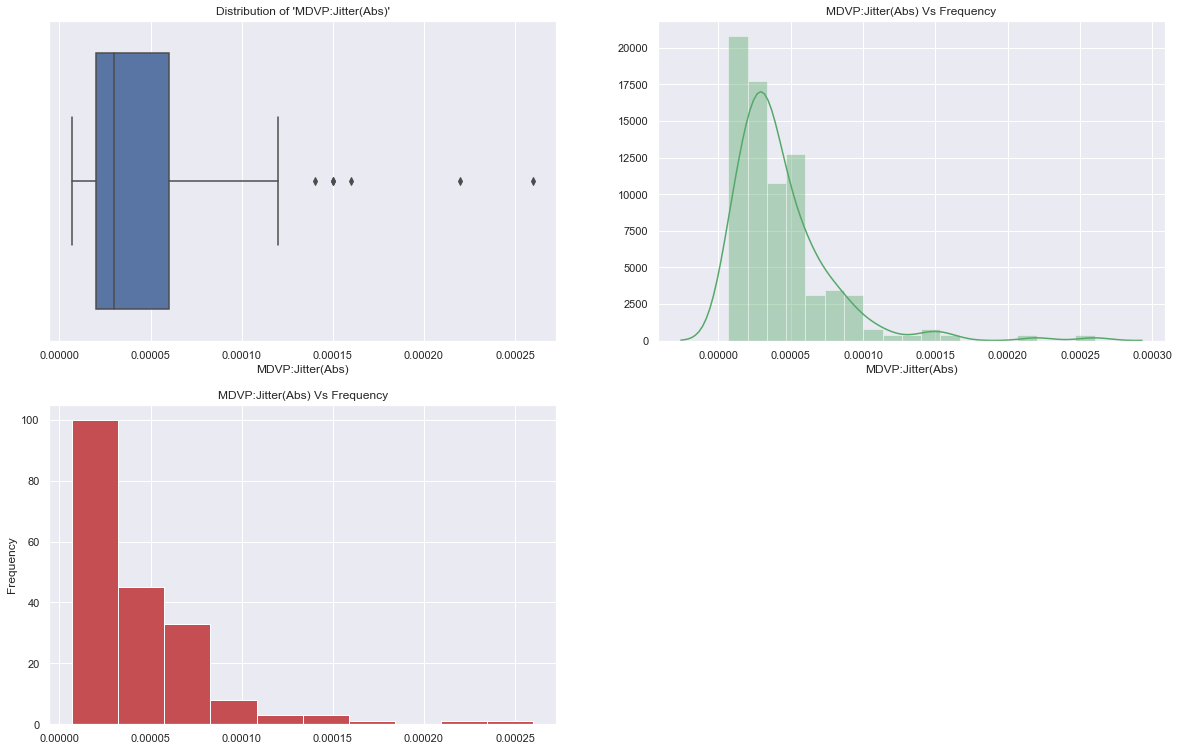

In [26]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Jitter(Abs)'], showfliers=True).set_title("Distribution of 'MDVP:Jitter(Abs)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Jitter(Abs)'],color='g').set_title("MDVP:Jitter(Abs) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Jitter(Abs)'].plot.hist(color='r').set_title("MDVP:Jitter(Abs) Vs Frequency");

- MDVP:Jitter(Abs) is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [27]:
q3 = data['MDVP:Jitter(Abs)'].quantile(0.75)
q1 = data['MDVP:Jitter(Abs)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 9.999999999999999e-05
outliers_below : -1.9999999999999995e-05


In [28]:
print(data['MDVP:Jitter(Abs)'].loc[data['MDVP:Jitter(Abs)']>outliers_above].count())
print(data['MDVP:Jitter(Abs)'].loc[data['MDVP:Jitter(Abs)']<outliers_below].count())

12
0


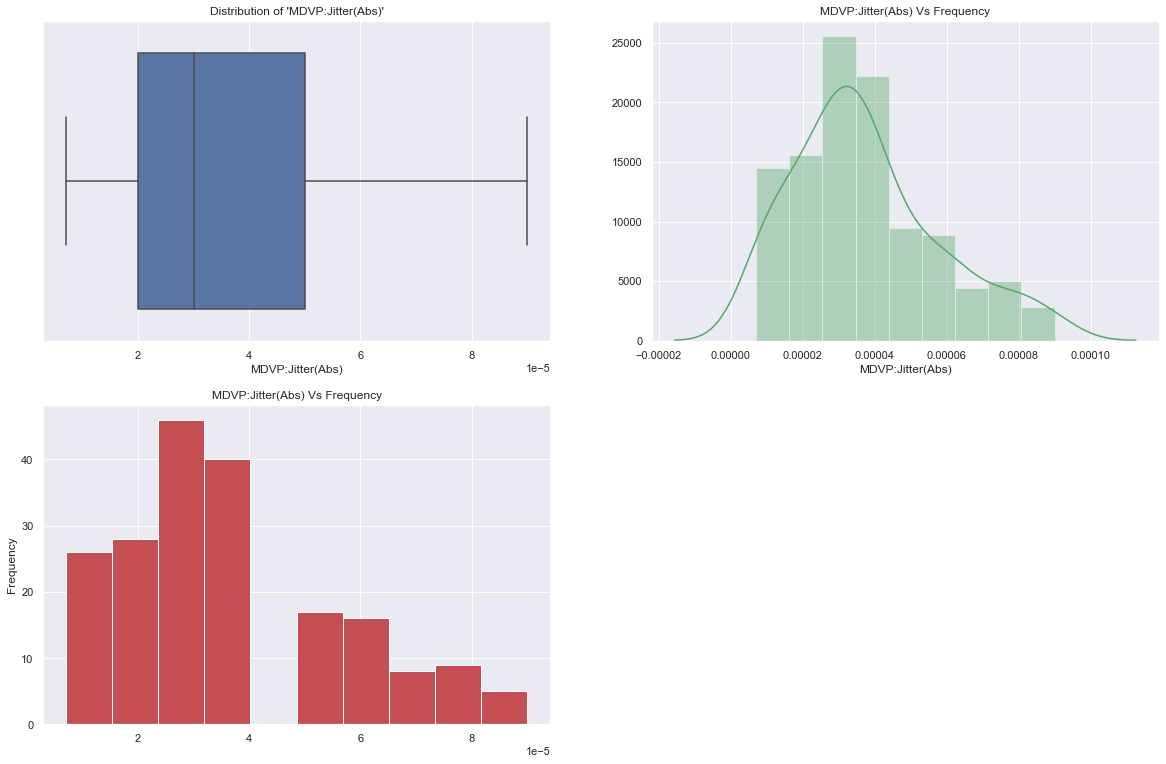

In [29]:
mean_val = data['MDVP:Jitter(Abs)'].loc[data['MDVP:Jitter(Abs)']<=outliers_above].mean()
data['MDVP:Jitter(Abs)'] = data['MDVP:Jitter(Abs)'].mask(data['MDVP:Jitter(Abs)']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Jitter(Abs)'], showfliers=True).set_title("Distribution of 'MDVP:Jitter(Abs)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Jitter(Abs)'],color='g').set_title("MDVP:Jitter(Abs) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Jitter(Abs)'].plot.hist(color='r').set_title("MDVP:Jitter(Abs) Vs Frequency");

- outliers are removed

### MDVP:RAP

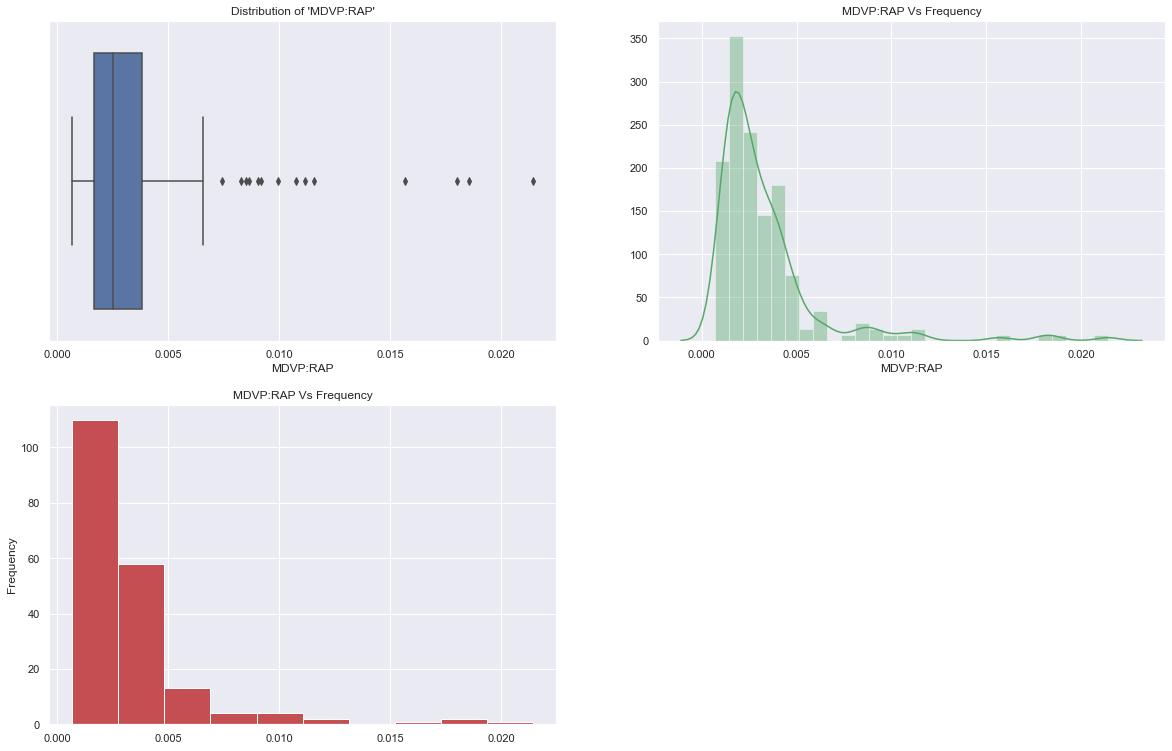

In [30]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:RAP'], showfliers=True).set_title("Distribution of 'MDVP:RAP'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:RAP'],color='g').set_title("MDVP:RAP Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:RAP'].plot.hist(color='r').set_title("MDVP:RAP Vs Frequency");

- MDVP:RAP is Right Skewed 
- Mean and median are not the same 
- There are lot of outliers

In [31]:
q3 = data['MDVP:RAP'].quantile(0.75)
q1 = data['MDVP:RAP'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.00601
outliers_below : -0.0005149999999999996


In [32]:
print(data['MDVP:RAP'].loc[data['MDVP:RAP']>outliers_above].count())
print(data['MDVP:RAP'].loc[data['MDVP:RAP']<outliers_below].count())

18
0


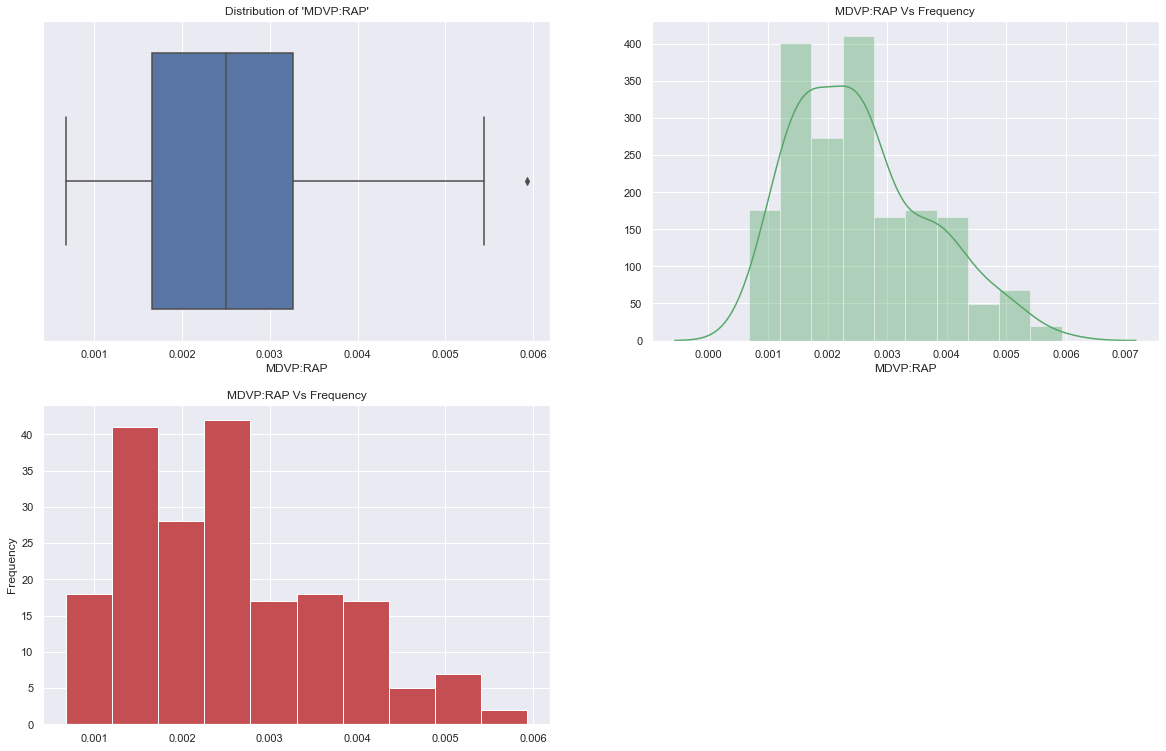

In [33]:
mean_val = data['MDVP:RAP'].loc[data['MDVP:RAP']<=outliers_above].mean()
data['MDVP:RAP'] = data['MDVP:RAP'].mask(data['MDVP:RAP']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:RAP'], showfliers=True).set_title("Distribution of 'MDVP:RAP'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:RAP'],color='g').set_title("MDVP:RAP Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:RAP'].plot.hist(color='r').set_title("MDVP:RAP Vs Frequency");

- Outliers are removed 


### MDVP:PPQ

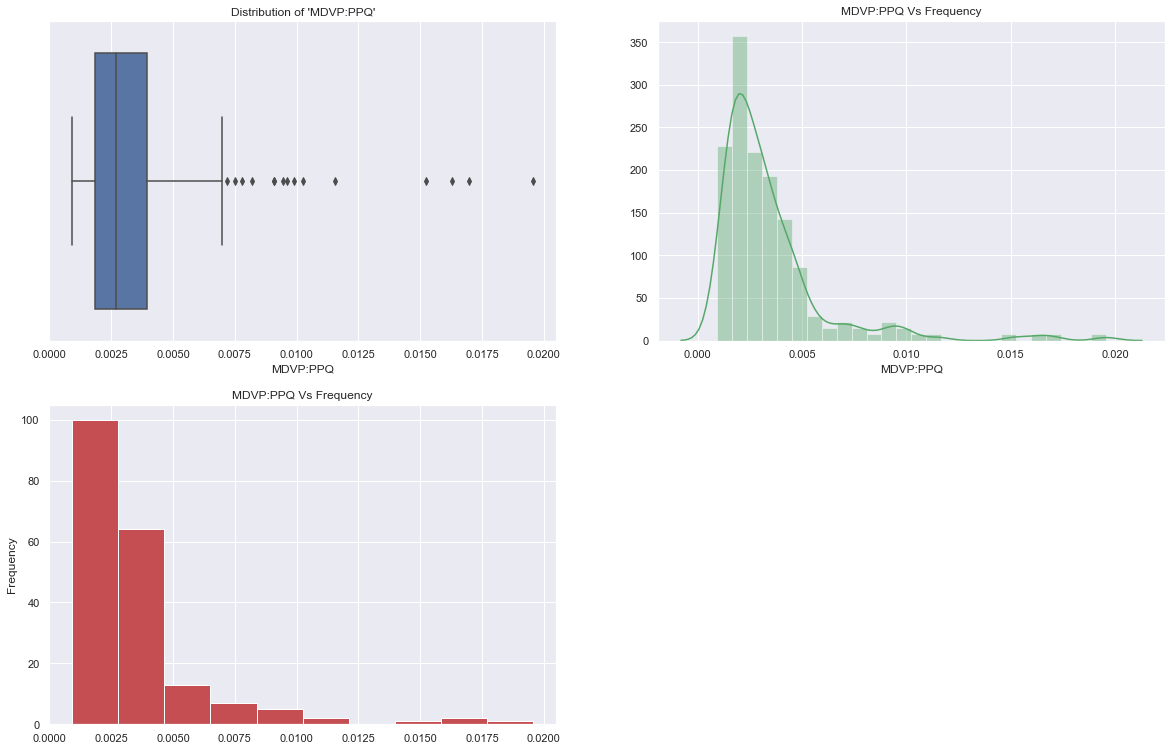

In [34]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:PPQ'], showfliers=True).set_title("Distribution of 'MDVP:PPQ'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:PPQ'],color='g').set_title("MDVP:PPQ Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:PPQ'].plot.hist(color='r').set_title("MDVP:PPQ Vs Frequency");

- MDVP:RAP is Right Skewed 
- Mean and median are not the same 
- There are lot of outliers

#### Outlier Treatment

In [35]:
q3 = data['MDVP:PPQ'].quantile(0.75)
q1 = data['MDVP:PPQ'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.00605
outliers_below : -0.00023499999999999997


In [36]:
print(data['MDVP:PPQ'].loc[data['MDVP:PPQ']>outliers_above].count())
print(data['MDVP:PPQ'].loc[data['MDVP:PPQ']<outliers_below].count())

19
0


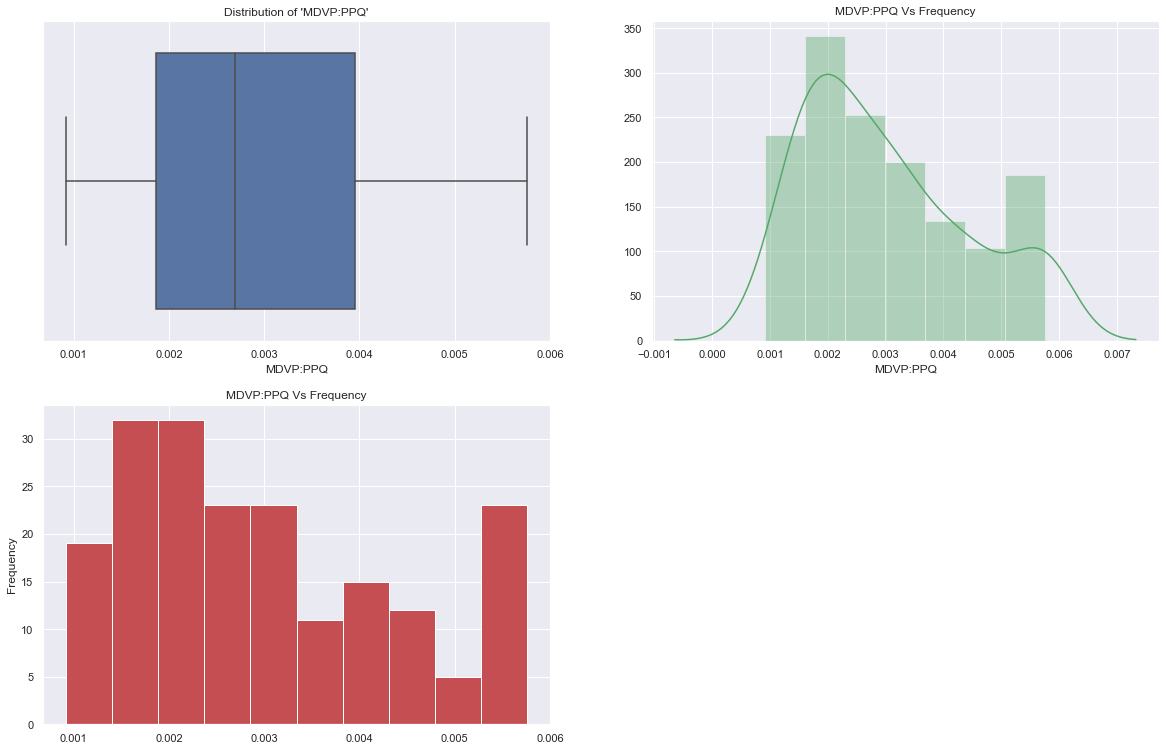

In [37]:
max_val = data['MDVP:PPQ'].loc[data['MDVP:PPQ']<=outliers_above].max()
data['MDVP:PPQ'] = data['MDVP:PPQ'].mask(data['MDVP:PPQ']>outliers_above,max_val)
# distribution after outlier treatment

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:PPQ'], showfliers=True).set_title("Distribution of 'MDVP:PPQ'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:PPQ'],color='g').set_title("MDVP:PPQ Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:PPQ'].plot.hist(color='r').set_title("MDVP:PPQ Vs Frequency");


- Outliers are removed

### Jitter:DDP

In [38]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Jitter:DDP'], showfliers=True).set_title("Distribution of 'Jitter:DDP'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Jitter:DDP'],color='g').set_title("Jitter:DDP Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Jitter:DDP'].plot.hist(color='r').set_title("Jitter:DDP Vs Frequency");

- Jitter:DDP  is Right Skewed 
- Mean and median are not the same 
- There are lot of outliers

#### Outlier Treatment

In [39]:
q3 = data['Jitter:DDP'].quantile(0.75)
q1 = data['Jitter:DDP'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.018025
outliers_below : -0.001535


In [40]:
print(data['Jitter:DDP'].loc[data['Jitter:DDP']>outliers_above].count())
print(data['Jitter:DDP'].loc[data['Jitter:DDP']<outliers_below].count())

18
0


In [41]:
max_val = data['Jitter:DDP'].loc[data['Jitter:DDP']<=outliers_above].max()
data['Jitter:DDP'] = data['Jitter:DDP'].mask(data['Jitter:DDP']>outliers_above,max_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Jitter:DDP'], showfliers=True).set_title("Distribution of 'Jitter:DDP'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Jitter:DDP'],color='g').set_title("Jitter:DDP Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Jitter:DDP'].plot.hist(color='r').set_title("Jitter:DDP Vs Frequency");

- outliers are removed

### Measures of variation in amplitude

### MDVP:Shimmer  

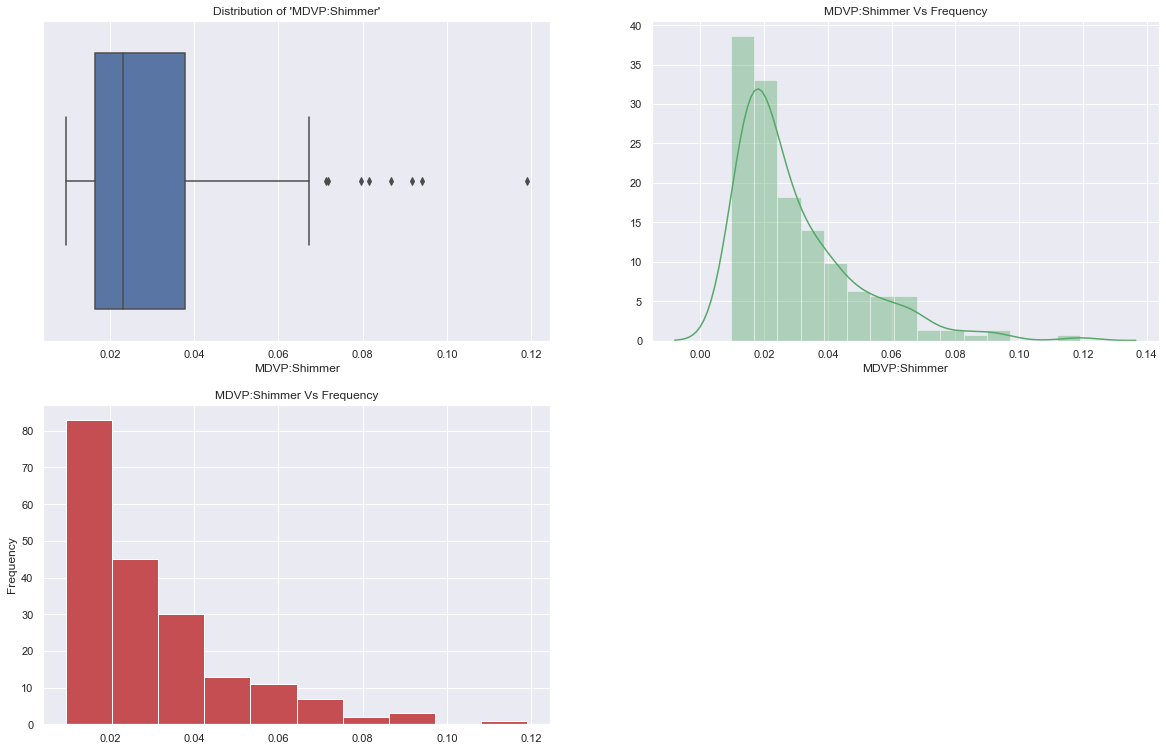

In [42]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Shimmer'], showfliers=True).set_title("Distribution of 'MDVP:Shimmer'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Shimmer'],color='g').set_title("MDVP:Shimmer Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Shimmer'].plot.hist(color='r').set_title("MDVP:Shimmer Vs Frequency");

- MDVP:Shimmer is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [43]:
q3 = data['MDVP:Shimmer'].quantile(0.75)
q1 = data['MDVP:Shimmer'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.059265000000000005
outliers_below : -0.004875000000000004


In [44]:
print(data['MDVP:Shimmer'].loc[data['MDVP:Shimmer']>outliers_above].count())
print(data['MDVP:Shimmer'].loc[data['MDVP:Shimmer']<outliers_below].count())

17
0


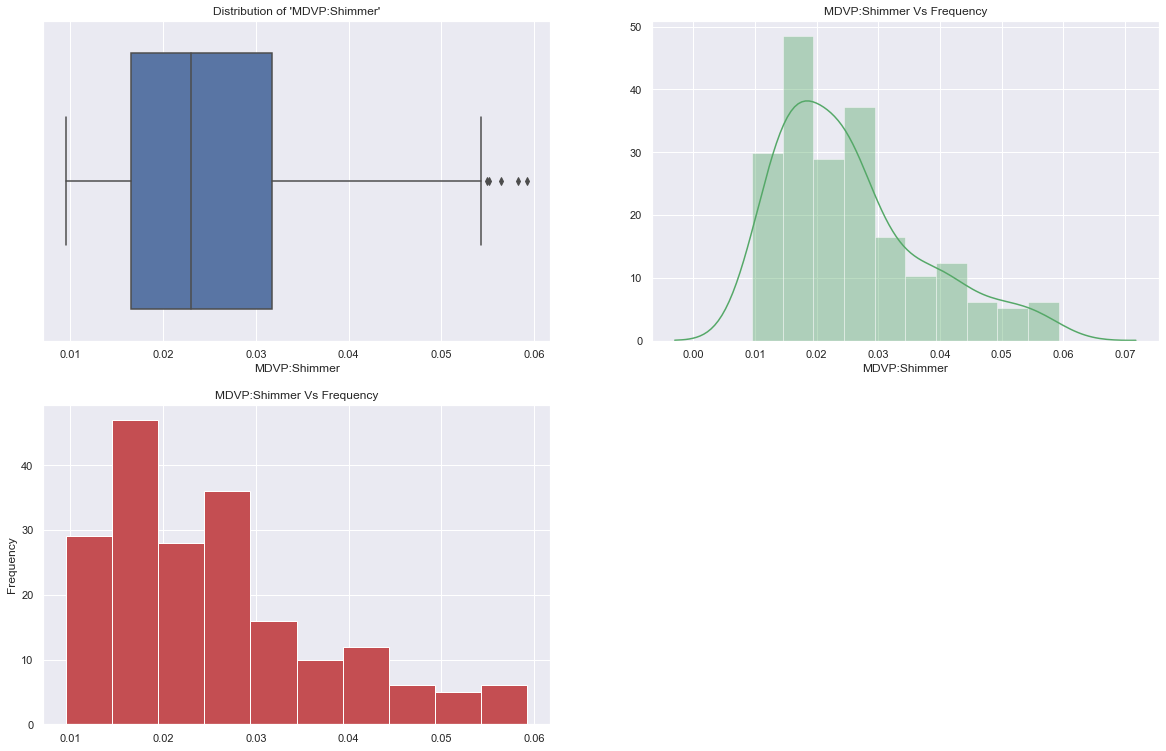

In [45]:
mean_val = data['MDVP:Shimmer'].loc[data['MDVP:Shimmer']<=outliers_above].mean()
data['MDVP:Shimmer'] = data['MDVP:Shimmer'].mask(data['MDVP:Shimmer']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Shimmer'], showfliers=True).set_title("Distribution of 'MDVP:Shimmer'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Shimmer'],color='g').set_title("MDVP:Shimmer Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Shimmer'].plot.hist(color='r').set_title("MDVP:Shimmer Vs Frequency");

- outliers are reduced

### MDVP:Shimmer(dB)  

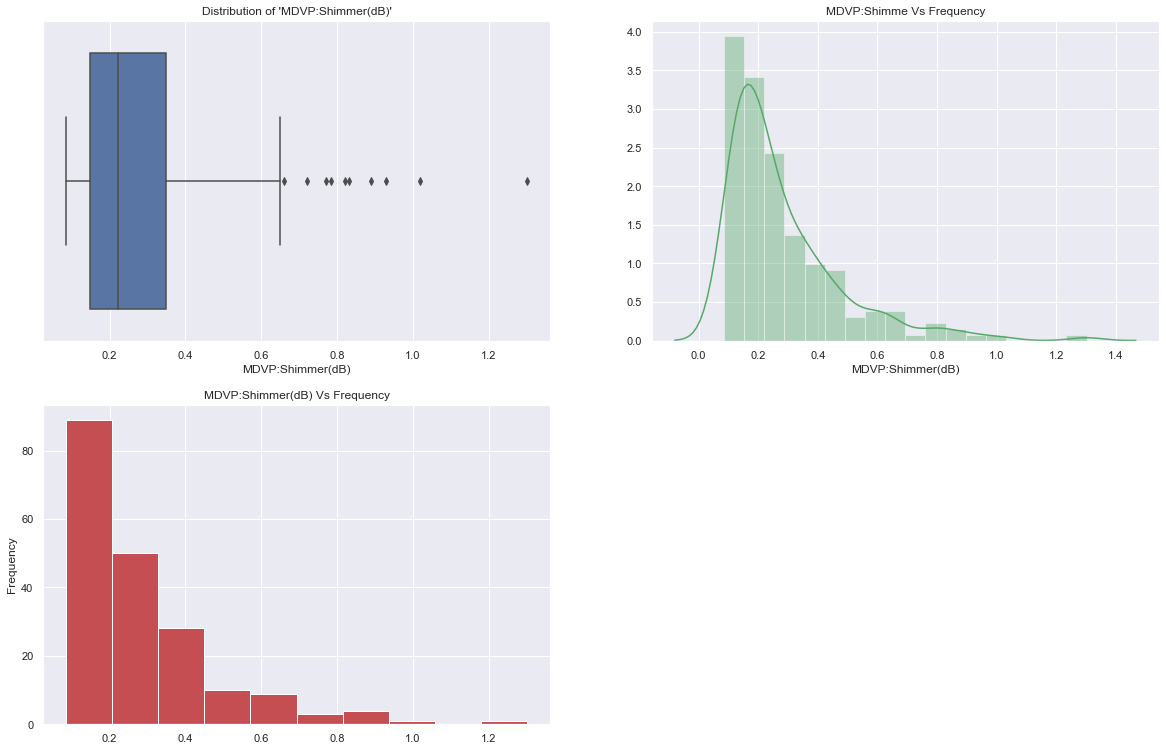

In [46]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Shimmer(dB)'], showfliers=True).set_title("Distribution of 'MDVP:Shimmer(dB)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Shimmer(dB)'],color='g').set_title("MDVP:Shimme Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Shimmer(dB)'].plot.hist(color='r').set_title("MDVP:Shimmer(dB) Vs Frequency");

- MDVP:Shimmer(dB) is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [47]:
q3 = data['MDVP:Shimmer(dB)'].quantile(0.75)
q1 = data['MDVP:Shimmer(dB)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.5515
outliers_below : -0.05299999999999999


In [48]:
print(data['MDVP:Shimmer(dB)'].loc[data['MDVP:Shimmer(dB)']>outliers_above].count())
print(data['MDVP:Shimmer(dB)'].loc[data['MDVP:Shimmer(dB)']<outliers_below].count())

19
0


In [49]:
mean_val = data['MDVP:Shimmer(dB)'].loc[data['MDVP:Shimmer(dB)']<=outliers_above].mean()
data['MDVP:Shimmer(dB)'] = data['MDVP:Shimmer(dB)'].mask(data['MDVP:Shimmer(dB)']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:Shimmer(dB)'], showfliers=True).set_title("Distribution of 'MDVP:Shimmer(dB)'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:Shimmer(dB)'],color='g').set_title("MDVP:Shimmer(dB) Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:Shimmer(dB)'].plot.hist(color='r').set_title("MDVP:Shimmer(dB) Vs Frequency");

- outliers are reduced

### Shimmer:APQ3   

In [50]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Shimmer:APQ3'], showfliers=True).set_title("Distribution of 'Shimmer:APQ3'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Shimmer:APQ3'],color='g').set_title("Shimmer:APQ3 Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Shimmer:APQ3'].plot.hist(color='r').set_title("Shimmer:APQ3 Vs Frequency");

- Shimmer:APQ3  is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [51]:
q3 = data['Shimmer:APQ3'].quantile(0.75)
q1 = data['Shimmer:APQ3'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.032284999999999994
outliers_below : -0.003774999999999997


In [52]:
print(data['Shimmer:APQ3'].loc[data['Shimmer:APQ3']>outliers_above].count())
print(data['Shimmer:APQ3'].loc[data['Shimmer:APQ3']<outliers_below].count())

16
0


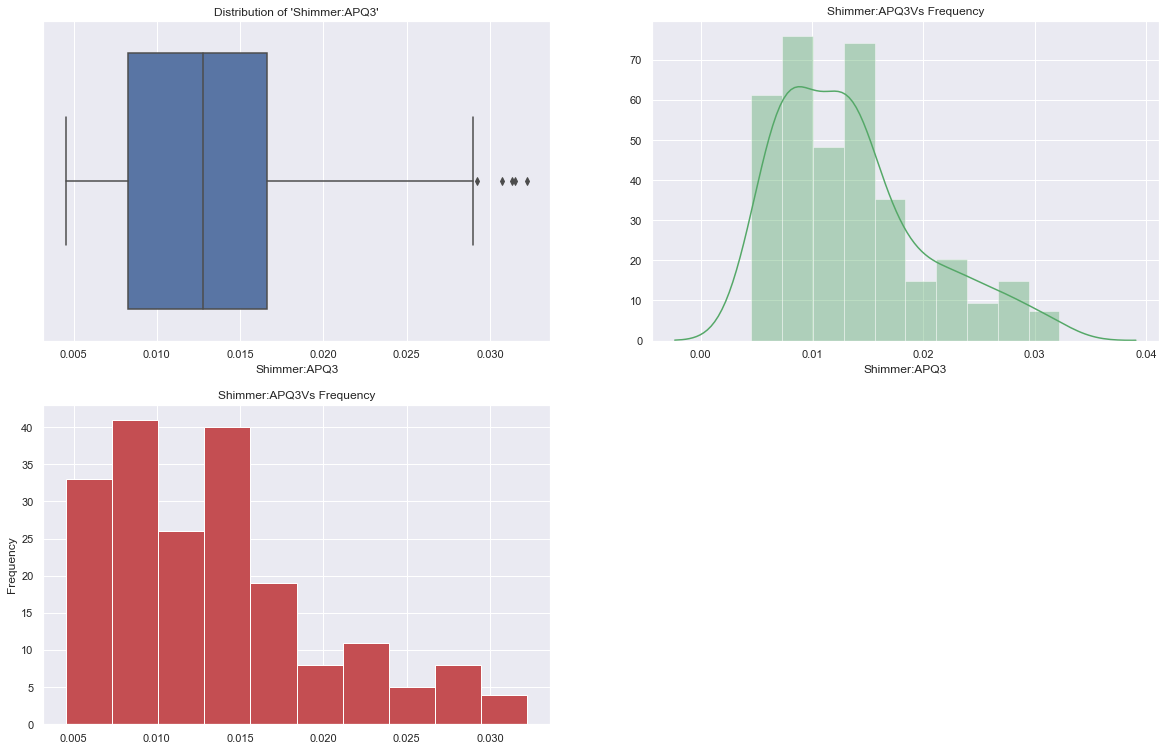

In [53]:
mean_val = data['Shimmer:APQ3'].loc[data['Shimmer:APQ3']<=outliers_above].mean()
data['Shimmer:APQ3'] = data['Shimmer:APQ3'].mask(data['Shimmer:APQ3']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Shimmer:APQ3'], showfliers=True).set_title("Distribution of 'Shimmer:APQ3'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Shimmer:APQ3'],color='g').set_title("Shimmer:APQ3Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Shimmer:APQ3'].plot.hist(color='r').set_title("Shimmer:APQ3Vs Frequency");

- outliers are reduced

### Shimmer:APQ5  

In [54]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Shimmer:APQ5'], showfliers=True).set_title("Distribution of 'Shimmer:APQ5'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Shimmer:APQ5'],color='g').set_title("Shimmer:APQ5 Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Shimmer:APQ5'].plot.hist(color='r').set_title("Shimmer:APQ5 Vs Frequency");

- Shimmer:APQ5 is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [55]:
q3 = data['Shimmer:APQ5'].quantile(0.75)
q1 = data['Shimmer:APQ5'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.03518
outliers_below : -0.003219999999999997


In [56]:
print(data['Shimmer:APQ5'].loc[data['Shimmer:APQ5']>outliers_above].count())
print(data['Shimmer:APQ5'].loc[data['Shimmer:APQ5']<outliers_below].count())

24
0


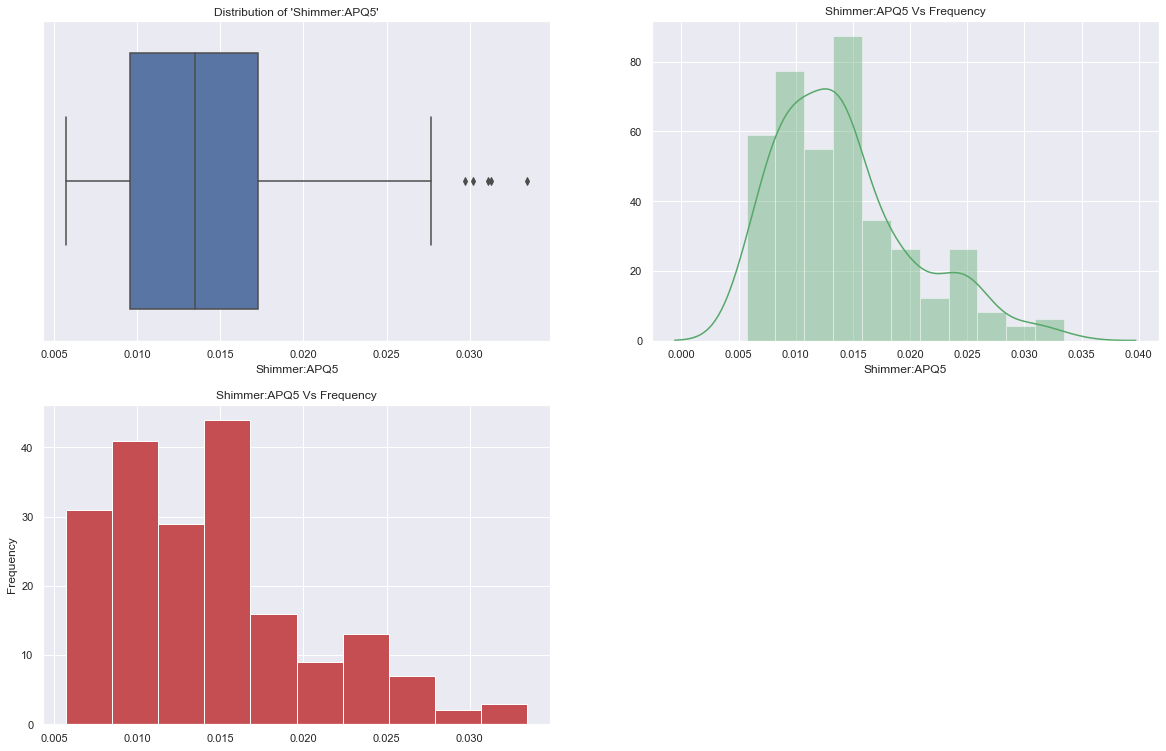

In [57]:
mean_val = data['Shimmer:APQ5'].loc[data['Shimmer:APQ5']<=outliers_above].mean()
data['Shimmer:APQ5'] = data['Shimmer:APQ5'].mask(data['Shimmer:APQ5']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Shimmer:APQ5'], showfliers=True).set_title("Distribution of 'Shimmer:APQ5'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Shimmer:APQ5'],color='g').set_title("Shimmer:APQ5 Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Shimmer:APQ5'].plot.hist(color='r').set_title("Shimmer:APQ5 Vs Frequency");

- outliers are reduced

### MDVP:APQ  

In [58]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:APQ'], showfliers=True).set_title("Distribution of 'MDVP:APQ'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:APQ'],color='g').set_title("MDVP:APQ Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:APQ'].plot.hist(color='r').set_title("MDVP:APQ Vs Frequency");

- MDVP:APQ is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [59]:
q3 = data['MDVP:APQ'].quantile(0.75)
q1 = data['MDVP:APQ'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.045720000000000004
outliers_below : -0.0032400000000000016


In [60]:
print(data['MDVP:APQ'].loc[data['MDVP:APQ']>outliers_above].count())
print(data['MDVP:APQ'].loc[data['MDVP:APQ']<outliers_below].count())

16
0


In [61]:
mean_val = data['MDVP:APQ'].loc[data['MDVP:APQ']<=outliers_above].mean()
data['MDVP:APQ'] = data['MDVP:APQ'].mask(data['MDVP:APQ']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['MDVP:APQ'], showfliers=True).set_title("Distribution of 'MDVP:APQ'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['MDVP:APQ'],color='g').set_title("MDVP:APQ Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['MDVP:APQ'].plot.hist(color='r').set_title("MDVP:APQ Vs Frequency");

- outliers are reduced

### Shimmer:DDA   

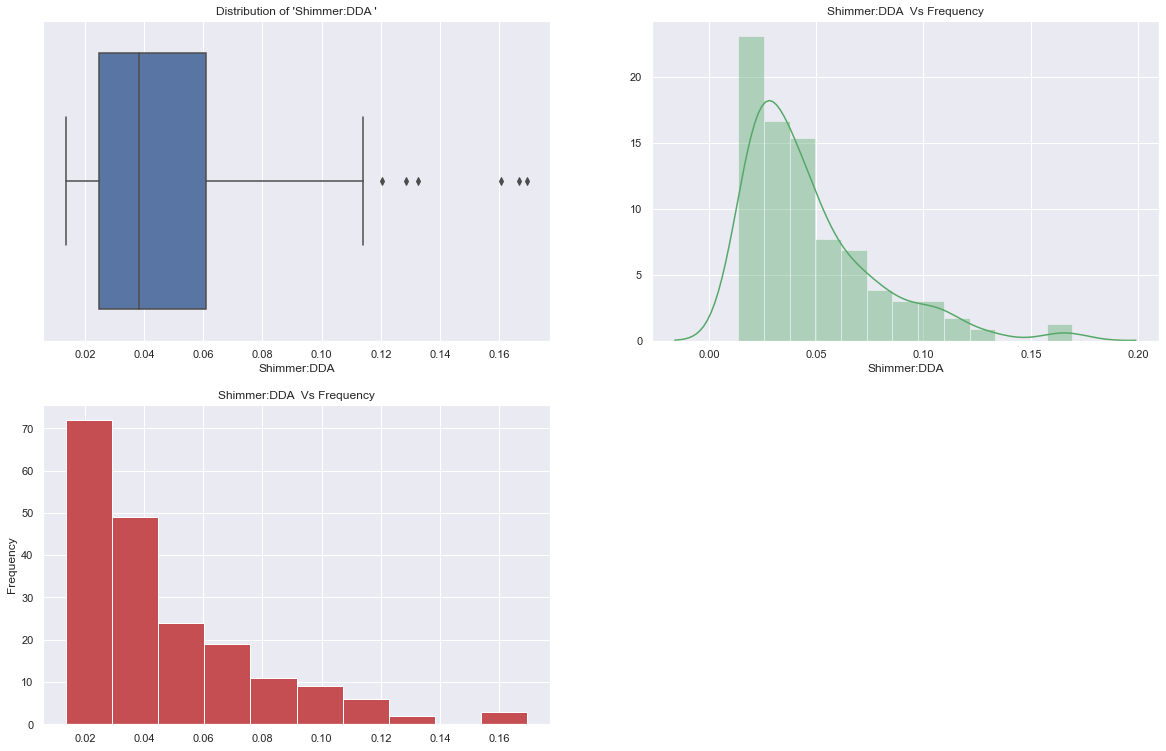

In [62]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Shimmer:DDA'], showfliers=True).set_title("Distribution of 'Shimmer:DDA '")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Shimmer:DDA'],color='g').set_title("Shimmer:DDA  Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Shimmer:DDA'].plot.hist(color='r').set_title("Shimmer:DDA  Vs Frequency");

- Shimmer:DDA  is Right Skewed 
- Mean and median are not the same 
- There are outliers

#### Outlier Treatment

In [63]:
q3 = data['Shimmer:DDA'].quantile(0.75)
q1 = data['Shimmer:DDA'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.096855
outliers_below : -0.011325000000000002


In [64]:
print(data['Shimmer:DDA'].loc[data['Shimmer:DDA']>outliers_above].count())
print(data['Shimmer:DDA'].loc[data['Shimmer:DDA']<outliers_below].count())

16
0


In [65]:
mean_val = data['Shimmer:DDA'].loc[data['Shimmer:DDA']<=outliers_above].mean()
data['Shimmer:DDA'] = data['Shimmer:DDA'].mask(data['Shimmer:DDA']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['Shimmer:DDA'], showfliers=True).set_title("Distribution of 'Shimmer:DDA'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['Shimmer:DDA'],color='g').set_title("Shimmer:DDA Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['Shimmer:DDA'].plot.hist(color='r').set_title("Shimmer:DDA Vs Frequency");

- outliers are reduced

### Measures of ratio of noise to tonal components in the voice 

### NHR  

In [66]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['NHR'], showfliers=True).set_title("Distribution of 'NHR'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['NHR'],color='g').set_title("NHR Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['NHR'].plot.hist(color='r').set_title("NHR Vs Frequency");

- NHR is Right Skewed with a long tail 
- Mean and median are not the same 
- There are lot of outliers

#### Outlier Treatment

In [67]:
q3 = data['NHR'].quantile(0.75)
q1 = data['NHR'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.045355
outliers_below : -0.01379


In [68]:
print(data['NHR'].loc[data['NHR']>outliers_above].count())
print(data['NHR'].loc[data['NHR']<outliers_below].count())

23
0


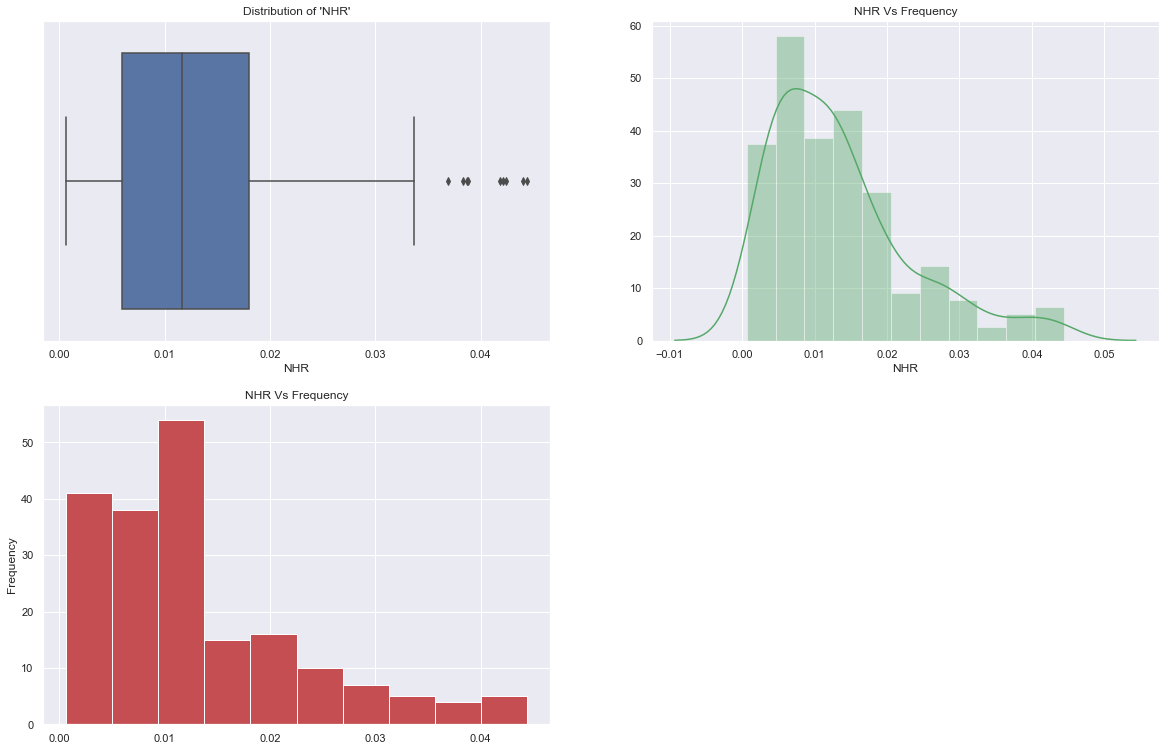

In [69]:
mean_val = data['NHR'].loc[data['NHR']<=outliers_above].mean()
data['NHR'] = data['NHR'].mask(data['NHR']>outliers_above,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['NHR'], showfliers=True).set_title("Distribution of 'NHR'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['NHR'],color='g').set_title("NHR Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['NHR'].plot.hist(color='r').set_title("NHR Vs Frequency");

- outliers are reduced

### HNR  

In [70]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['HNR'], showfliers=True).set_title("Distribution of 'HNR'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['HNR'],color='g').set_title("MDVP:Shimme Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['HNR'].plot.hist(color='r').set_title("HNR Vs Frequency");

- HNR is slightly left
- Mean and median are not the same 
- There are very less outliers

#### Outlier Treatment

In [71]:
q3 = data['HNR'].quantile(0.75)
q1 = data['HNR'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 30.952999999999996
outliers_below : 13.320500000000003


In [72]:
print(data['HNR'].loc[data['HNR']>outliers_above].count())
print(data['HNR'].loc[data['HNR']<outliers_below].count())

3
10


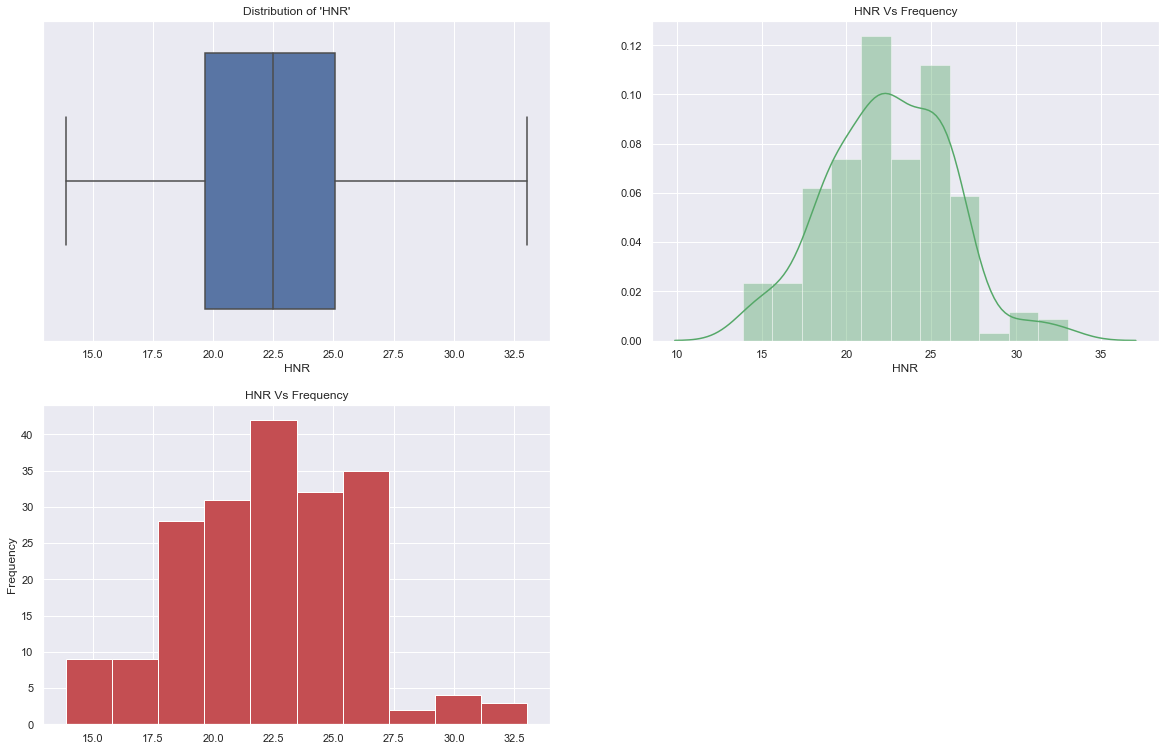

In [73]:
mean_val = data['HNR'].loc[data['HNR']>outliers_below].mean()
data['HNR'] = data['HNR'].mask(data['HNR']<outliers_below,mean_val)
# distribution after outlier correction

plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['HNR'], showfliers=True).set_title("Distribution of 'HNR'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['HNR'],color='g').set_title("HNR Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['HNR'].plot.hist(color='r').set_title("HNR Vs Frequency");

- outliers are removed

### Two nonlinear dynamical complexity measures

### RPDE  

In [74]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['RPDE'], showfliers=True).set_title("Distribution of 'RPDE'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['RPDE'],color='g').set_title("MDVP:Shimme Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['RPDE'].plot.hist(color='r').set_title("RPDE Vs Frequency");

- RPDE is normally distributed
- Mean and median are nearly same
- There are no outliers

### D2  

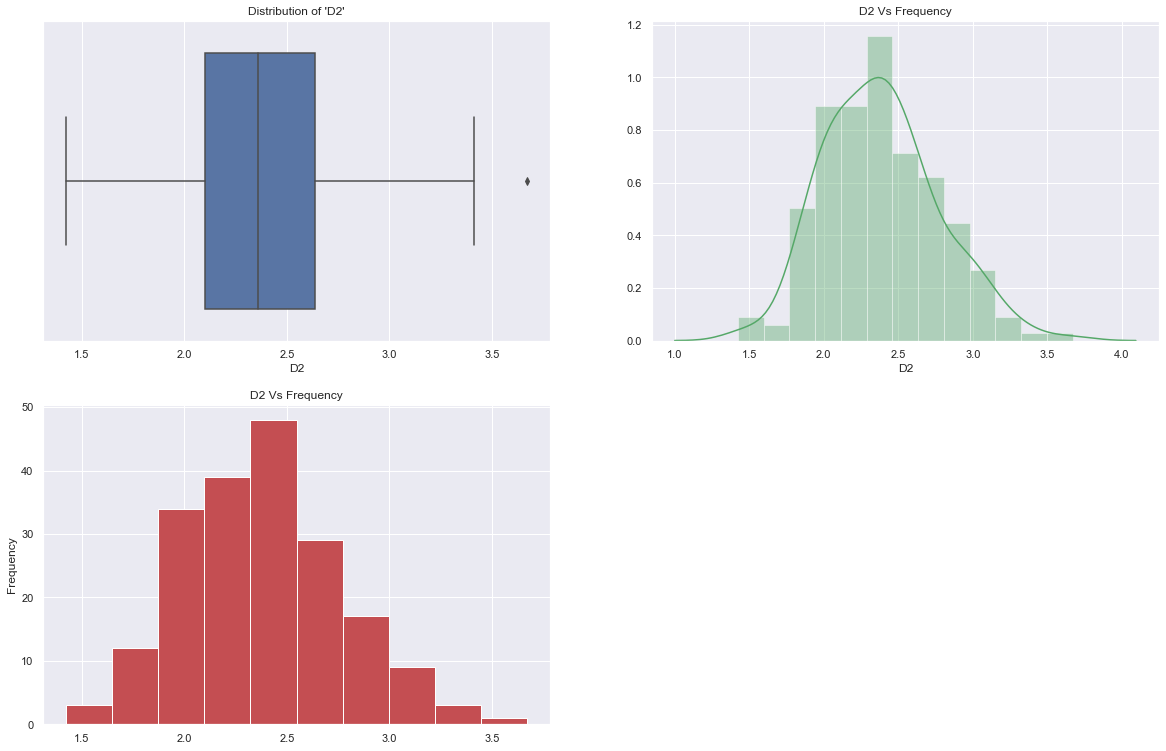

In [75]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['D2'], showfliers=True).set_title("Distribution of 'D2'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['D2'],color='g').set_title("D2 Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['D2'].plot.hist(color='r').set_title("D2 Vs Frequency");

- D2 is Normally distributed 
- Mean and median are almost the same 
- There are very less or no  outliers

### DFA

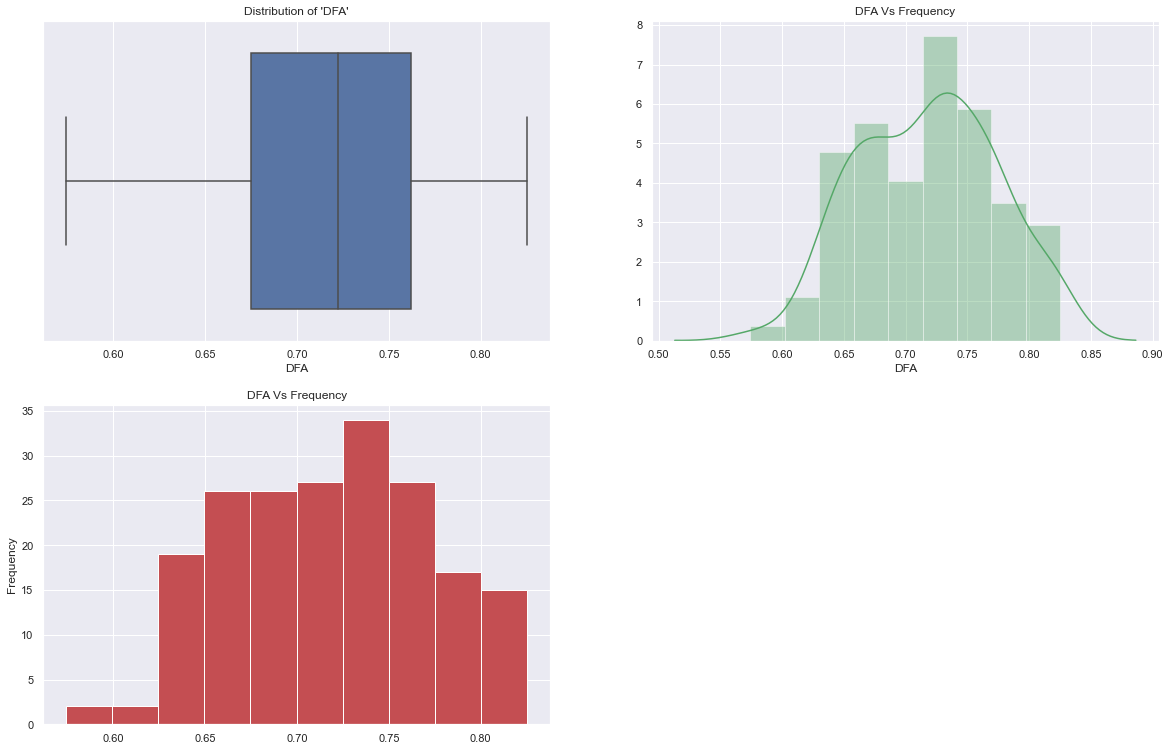

In [76]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['DFA'], showfliers=True).set_title("Distribution of 'DFA'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['DFA'],color='g').set_title("DFA Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['DFA'].plot.hist(color='r').set_title("DFA Vs Frequency");

- DFA is Normally distributed 
- Mean and median are almost the same 
- There are no  outliers

### Three nonlinear measures of fundamental frequency variation

### spread1

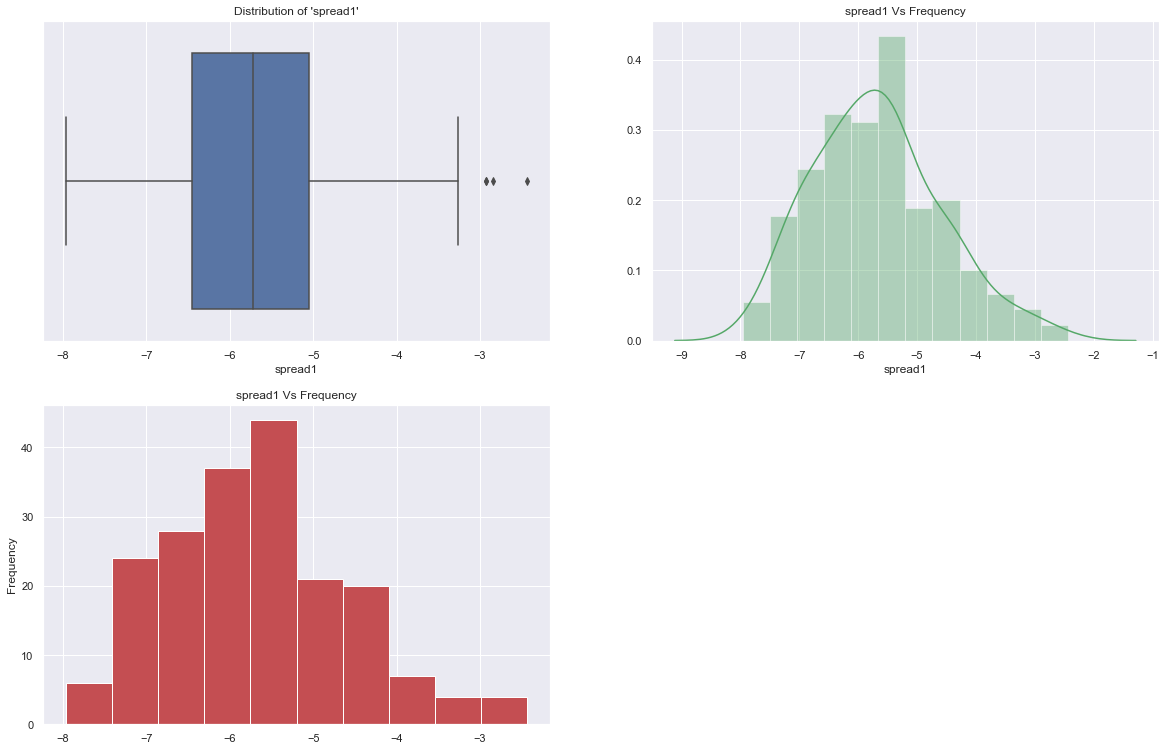

In [77]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['spread1'], showfliers=True).set_title("Distribution of 'spread1'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['spread1'],color='g').set_title("spread1 Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['spread1'].plot.hist(color='r').set_title("spread1 Vs Frequency");

- spread1 is Normally distributed 
- Mean and median are almost the same 
- There are very less outliers

### spread2

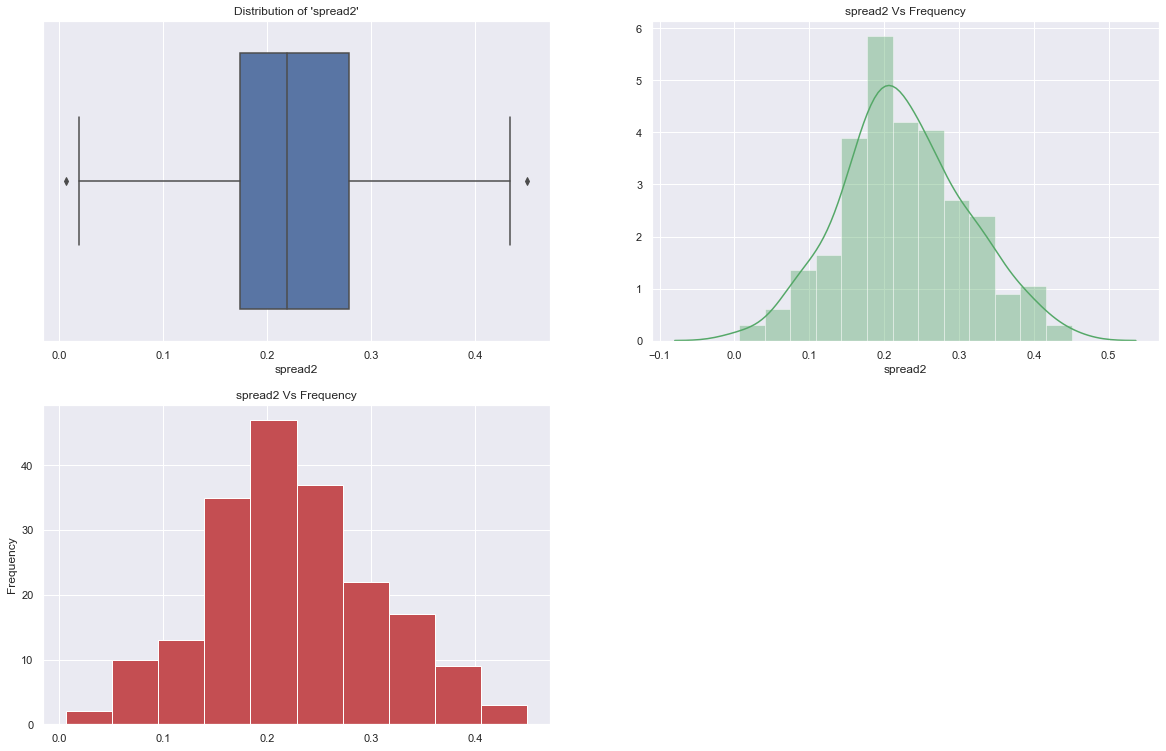

In [78]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['spread2'], showfliers=True).set_title("Distribution of 'spread2'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['spread2'],color='g').set_title("spread2 Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['spread2'].plot.hist(color='r').set_title("spread2 Vs Frequency");

- spread2 is Normally distributed 
- Mean and median are almost the same 
- There very less or no  outliers

### PPE

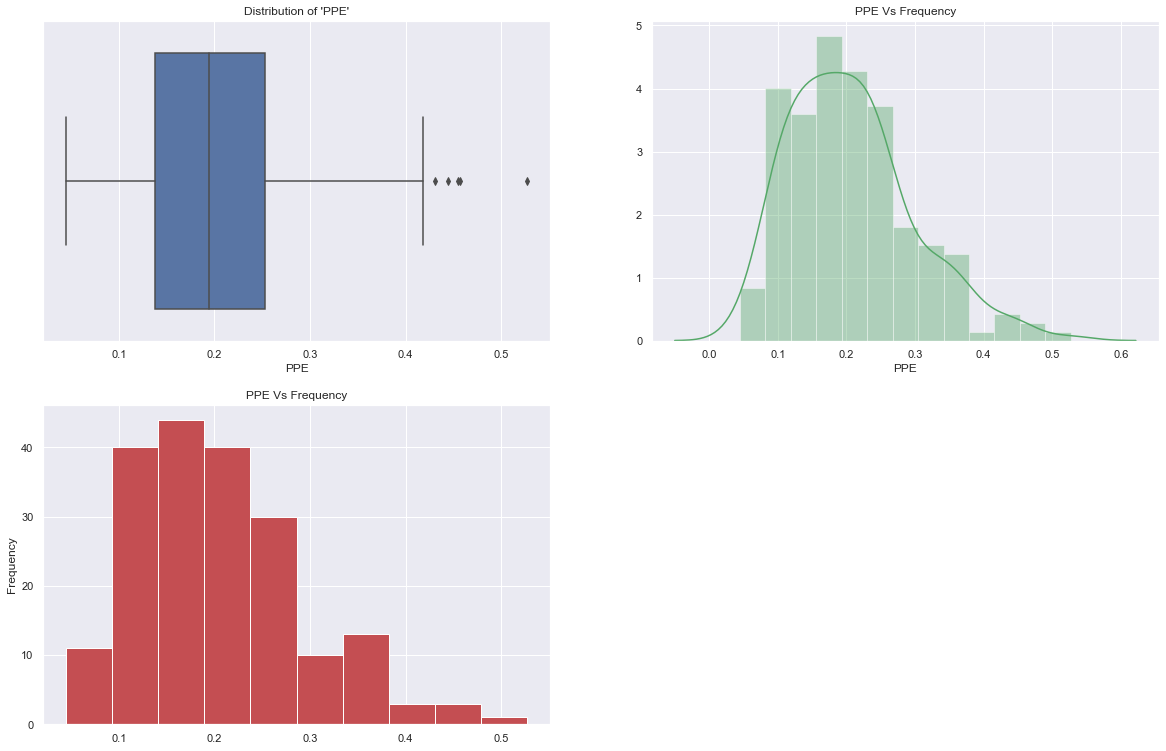

In [79]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,2,1)
sns.boxplot(data['PPE'], showfliers=True).set_title("Distribution of 'PPE'")

#distplot
plt.subplot(3,2,2)
sns.distplot(data['PPE'],color='g').set_title("PPE Vs Frequency")

#histogram plot
plt.subplot(3,2,3)
data['PPE'].plot.hist(color='r').set_title("PPE Vs Frequency");

- PPE is Normally distributed 
- Mean and median are almost the same 
- There are very less outliers

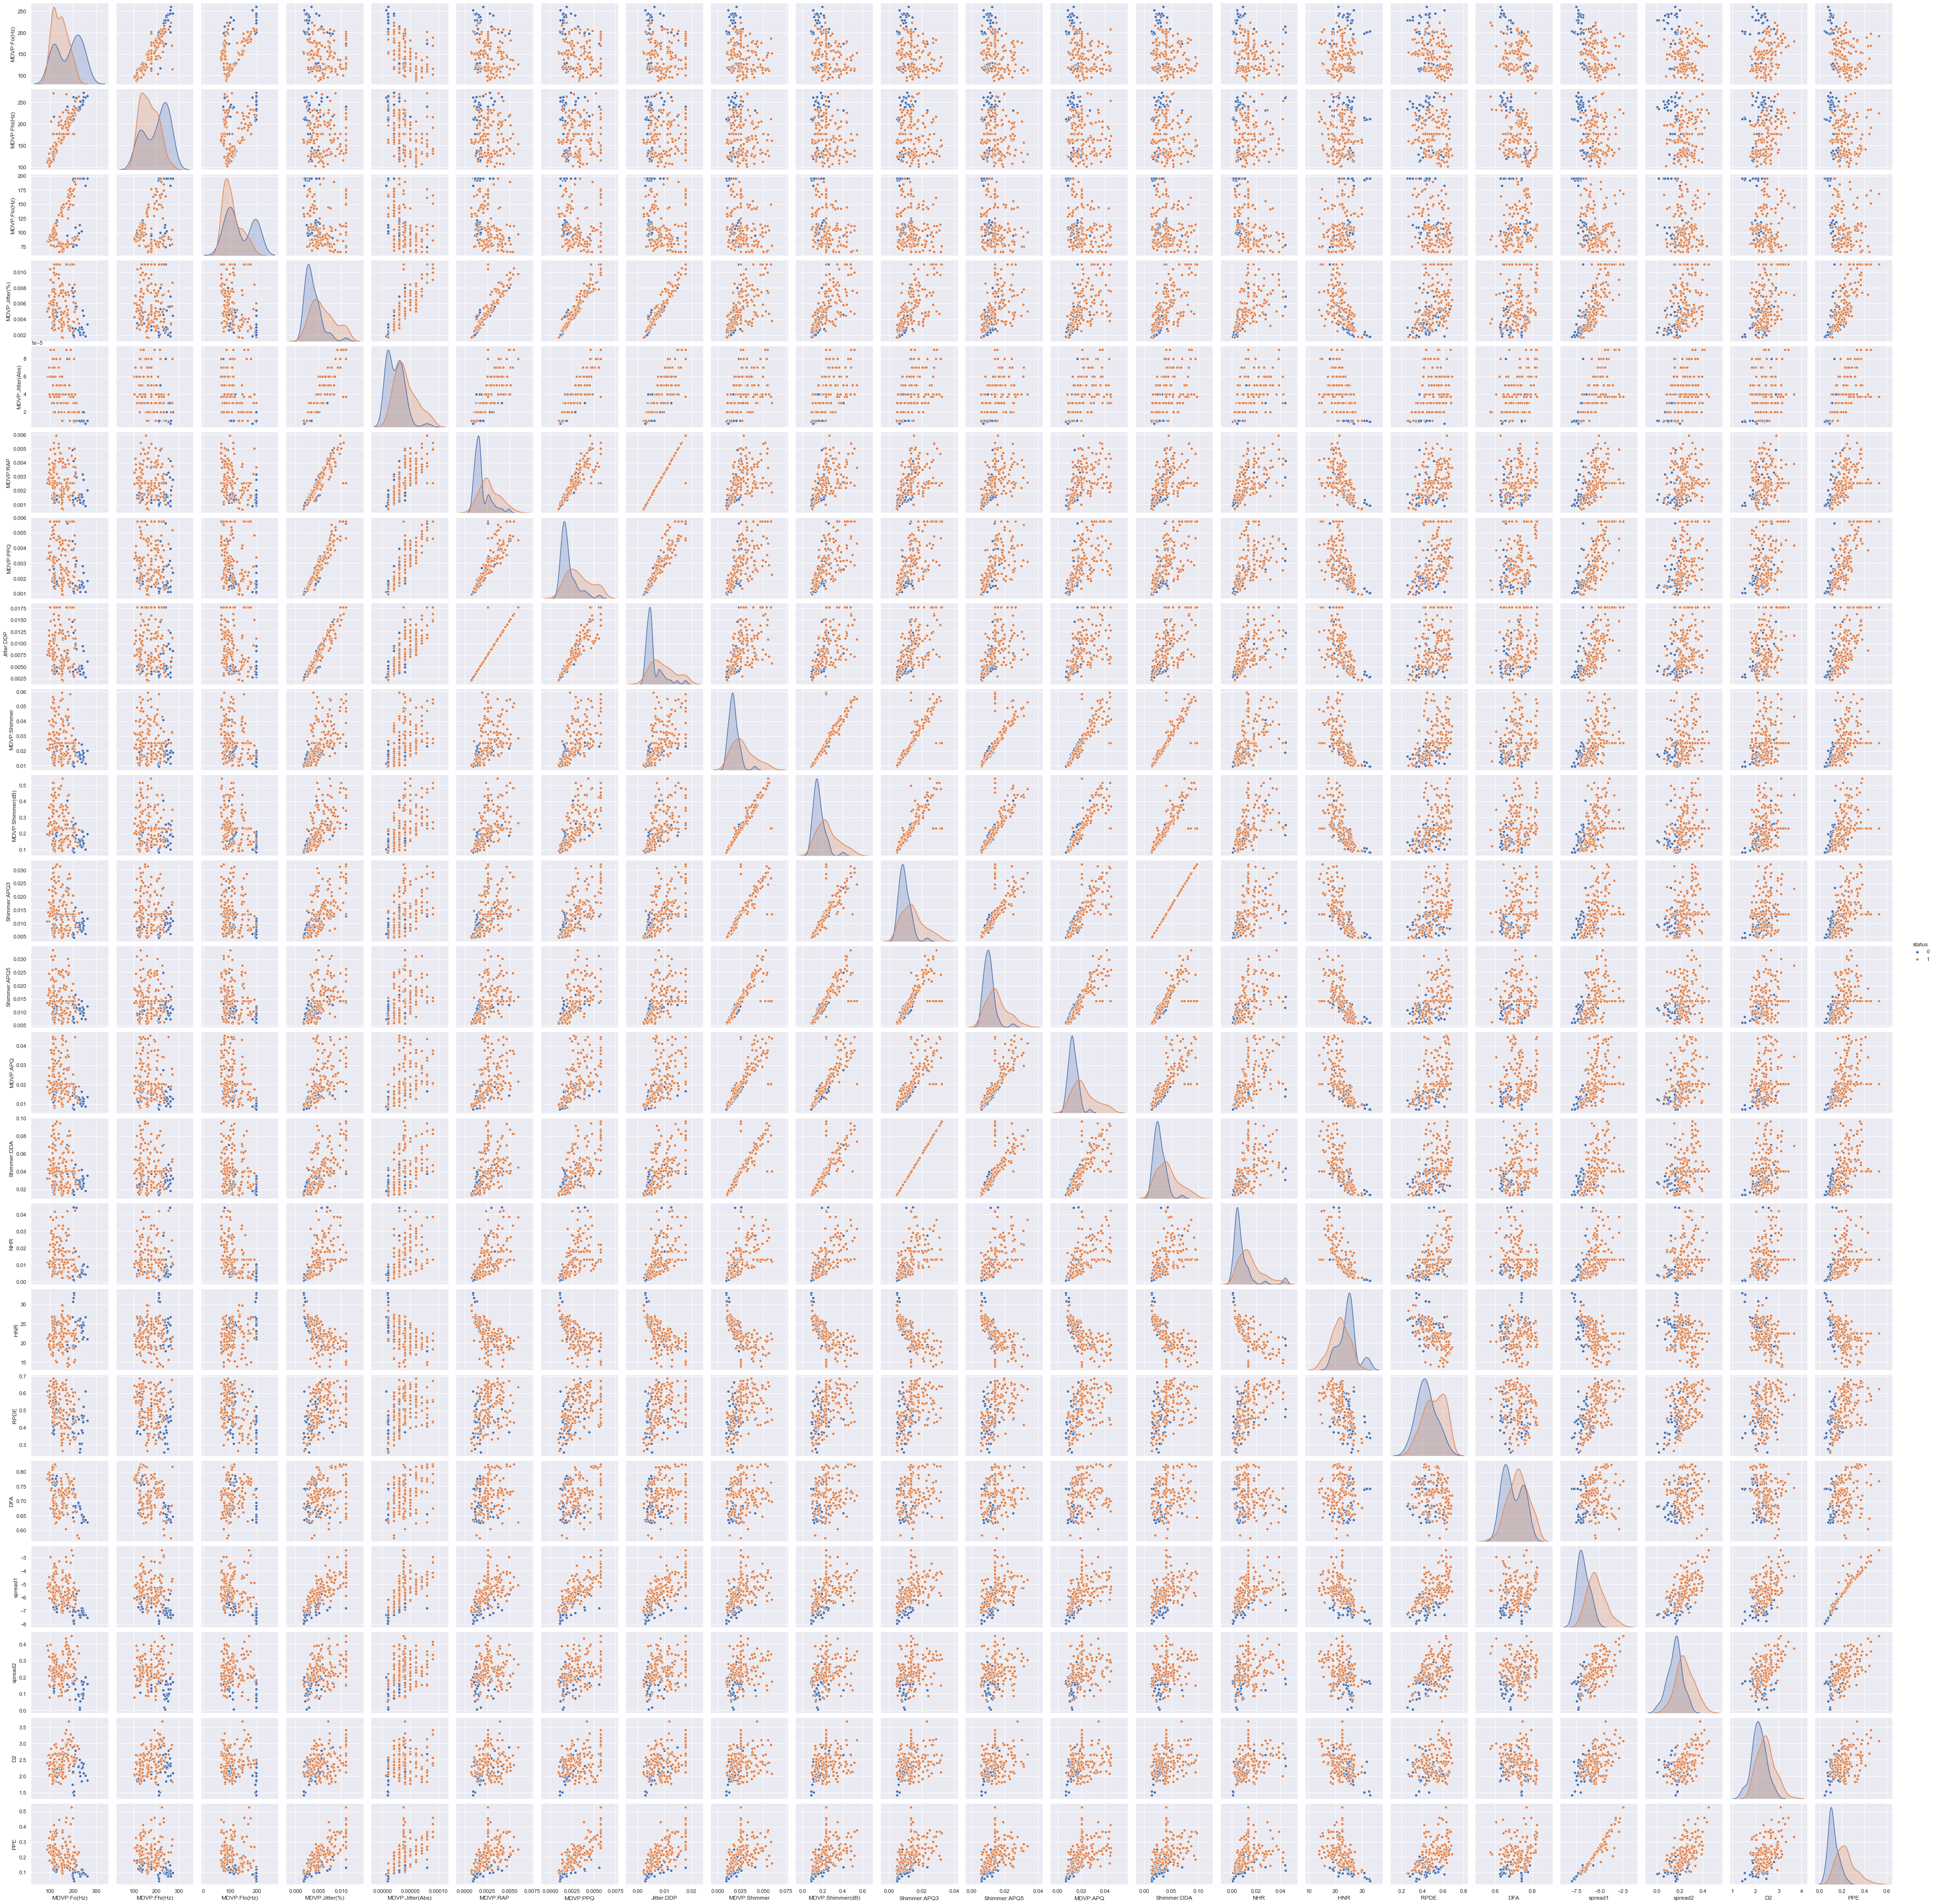

In [80]:
sns.pairplot(data.iloc[:,1:],hue='status') 

In [81]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation of Attributes')
plt.show()

### Based on Pair Plot and Correlation Matrix we Understand that

- The Target Column 'Status' has comparitively high correlation with Spread 1, spread 2 and PPE and is Positively associated with all other attributes  exeot for MDVP:Fo,MDVP:Fhi ,MDVP Flo and HNR for which it is negatively associated

- MDVP:Fo(Hz) is negatively associated with most of the attributes but is +vely associated to minimum and maximum vocal fundamental frequency

- All the measures of variation in 'Fundamental frequency' and  variation in 'amplitude' has strong positive association with eachother ,have positive association with'non linear dynamic complexity measures' and 'non linear measures of fundamental frequency variation' also have high Negative association with 'NHR'

- NHR has Negative association with almost all attributes except maximum vocal fundamental frequency

- The two non linear dynamic complexity measures(RPDE,D2) has a very slight -ve association with eachother and are positively associated with most of the variables except for vocal fundamental frequencies and NHR which shows a  negative association

- The 3 'non linear measures of fundamental frequency variation' have positive asoociation with eachother and almost all the attributes except the three vocal fundamental frequencies for which it has a negative association 

- DFA has slight positive association with most of the attributes and has a comparitively high correlation with average and maximum vocal fundamental frequencies 


#### Target Column (Status) Distribution

In [82]:
status_counts = pd.DataFrame(data["status"].value_counts()).reset_index()
status_counts.columns =["Labels","status"]
status_counts

Labels  status
0       1     147
1       0      48

From the above value We can see that the cases for Parkinson's disease is more than twice when compared to the healthy cases 

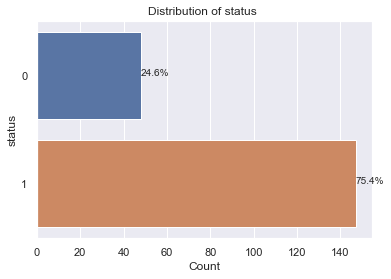

In [83]:
ax=sns.countplot(y="status", data=data)
plt.title('Distribution of status ')
plt.xlabel('Count')

total = len(data["status"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

From the above graph we understand 75.4% of the cases have Parkinson's disease and rest are Healthy

### Influence of Different attributes on Personal Loan

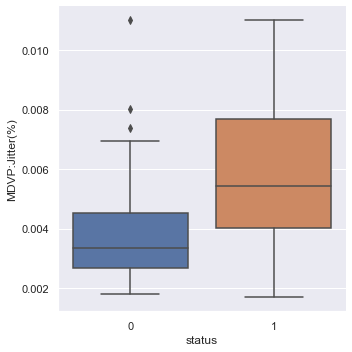

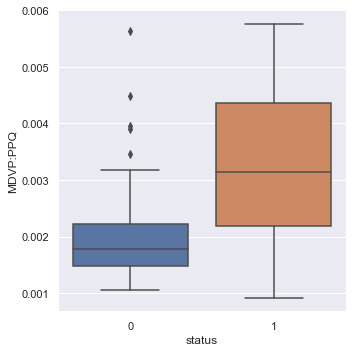

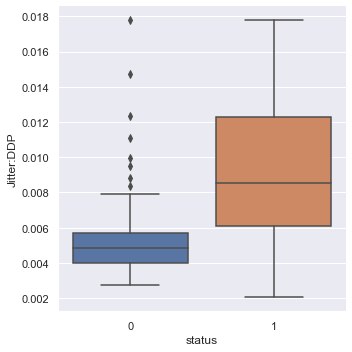

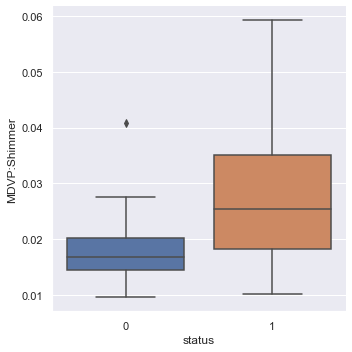

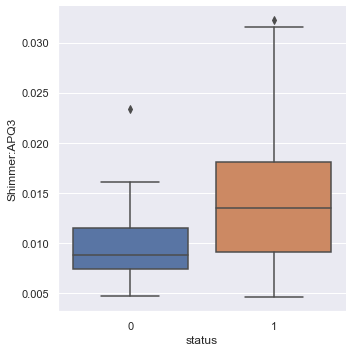

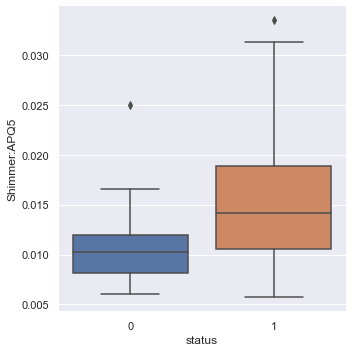

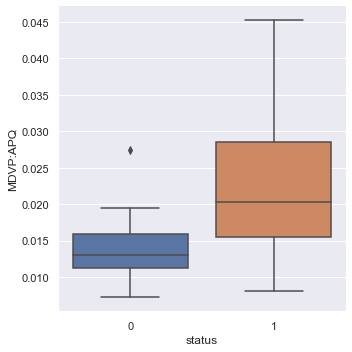

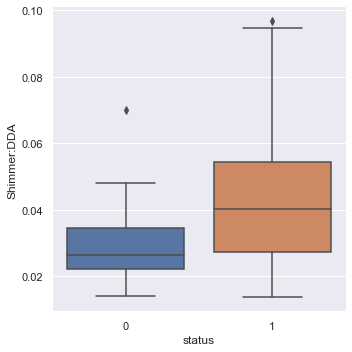

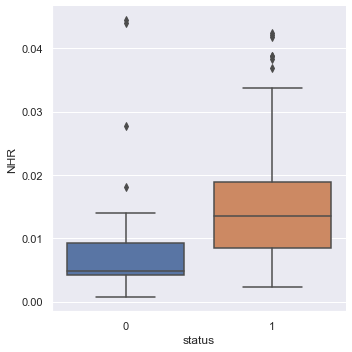

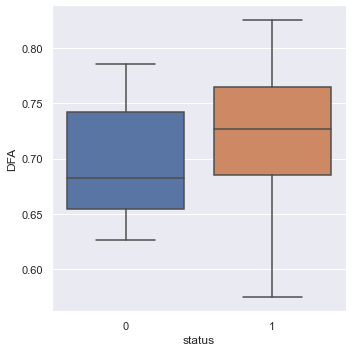

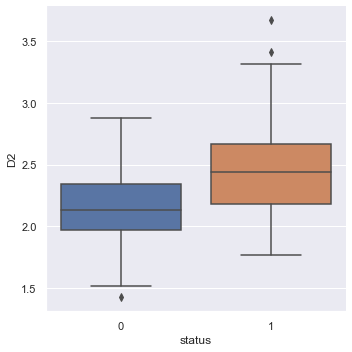

In [84]:
for i in data:
    if i != 'status' and i != 'name':
        sns.catplot(x='status',y=i,kind='box',data=data)

Healthy Persons are having more  vocal fundamental frequency,HNR, than the person having the Disease
all the other values are Comparitively Higher for Diseased Persons than Healthy Persons

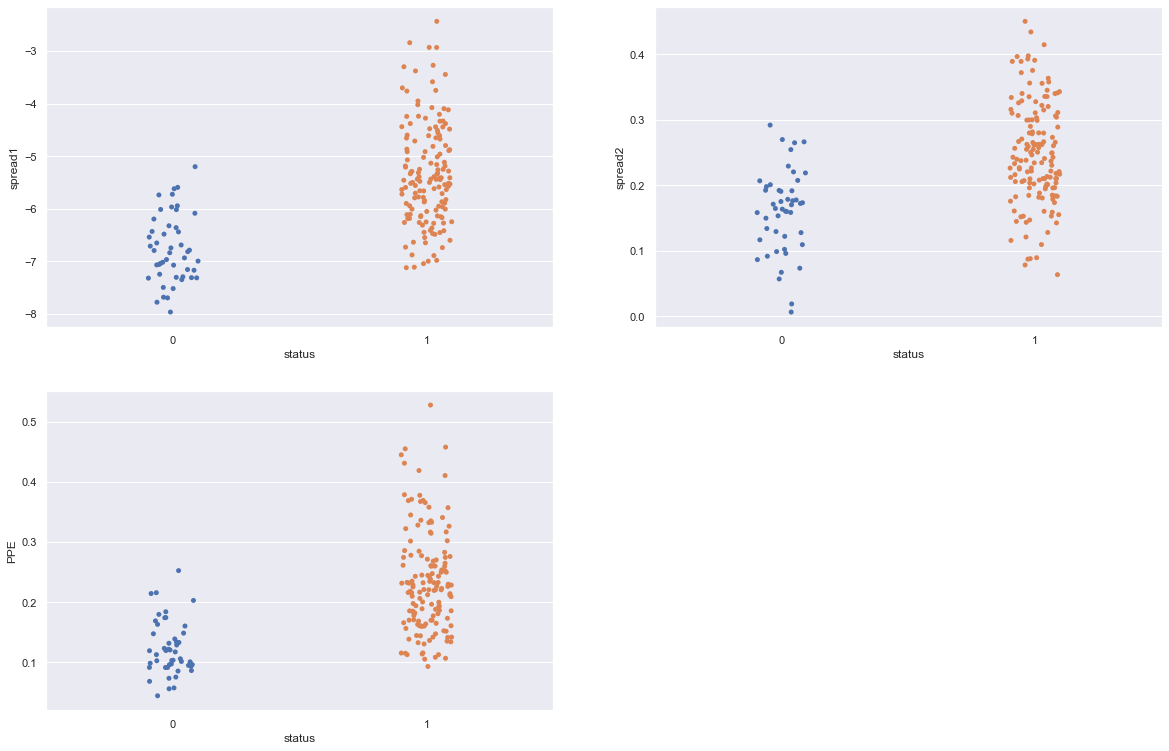

In [85]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.stripplot(data['status'], data['spread1'])

plt.subplot(3,2,2)
sns.stripplot(data['status'], data['spread2'])

plt.subplot(3,2,3)
sns.stripplot(data['status'], data['PPE'])

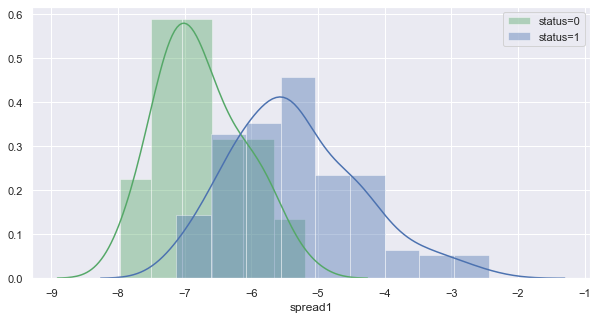

In [86]:
plt.figure(figsize=(10,5))
sns.distplot( data[data['status'] == 0]['spread1'], color = 'g',label='status=0')
sns.distplot( data[data['status'] == 1]['spread1'], color = 'b',label='status=1')
plt.legend()

spread1 values are higher for persons those who have the disease 

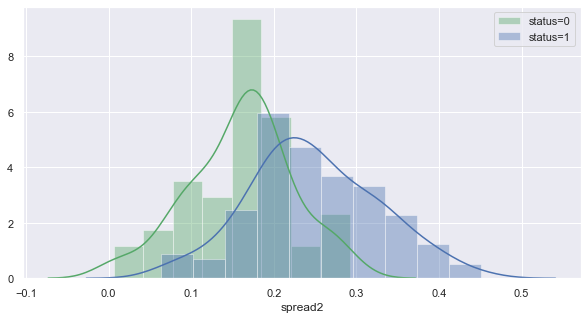

In [87]:
plt.figure(figsize=(10,5))
sns.distplot( data[data['status'] == 0]['spread2'], color = 'g',label='status=0')
sns.distplot( data[data['status'] == 1]['spread2'], color = 'b',label='status=1')
plt.legend()

spread2 values are slightly higher for persons those who have the disease

In [88]:
plt.figure(figsize=(10,5))
sns.distplot( data[data['status'] == 0]['PPE'], color = 'g',label='status=0')
sns.distplot( data[data['status'] == 1]['PPE'], color = 'b',label='status=1')
plt.legend()

PPE values are slightly higher for persons those who have the disease

### Droping Non Relevent Columns

The column'name' is not relevent for our model building so we will drop it

In [89]:
data = data.drop(['name'], axis=1)

In [90]:
data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784          0.000070   
1      122.400       148.650       113.819         0.00968          0.000080   
2      116.682       131.111       111.555         0.01050          0.000090   
3      116.676       137.871       111.366         0.00997          0.000090   
4      116.014       141.781       110.655         0.01101          0.000037   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.003700   0.00554     0.01109      0.043740          0.426000  ...   
1  0.004650   0.00576     0.01394      0.025373          0.231949  ...   
2  0.005440   0.00576     0.01633      0.052330          0.482000  ...   
3  0.005020   0.00576     0.01505      0.054920          0.517000  ...   
4  0.002549   0.00576     0.01778      0.025373          0.231949  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0     0.065450  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1     0.094030  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2     0.082700  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3     0.087710  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4     0.040303  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 23 columns]

### Spliting the data into training and test set in the ratio of 70:30 respectively

In [91]:
X=data.drop('status', axis=1)
y=data[['status']]
X.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784          0.000070   
1      122.400       148.650       113.819         0.00968          0.000080   
2      116.682       131.111       111.555         0.01050          0.000090   
3      116.676       137.871       111.366         0.00997          0.000090   
4      116.014       141.781       110.655         0.01101          0.000037   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.003700   0.00554     0.01109      0.043740          0.426000  ...   
1  0.004650   0.00576     0.01394      0.025373          0.231949  ...   
2  0.005440   0.00576     0.01633      0.052330          0.482000  ...   
3  0.005020   0.00576     0.01505      0.054920          0.517000  ...   
4  0.002549   0.00576     0.01778      0.025373          0.231949  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971     0.065450  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368     0.094030  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590     0.082700  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772     0.087710  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465     0.040303  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 22 columns]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)# Fit the model on train

columns = X_train.columns

In [93]:
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (136, 22)
y train data (136, 1)
x test data  (59, 22)
y test data  (59, 1)


#### Performing Feature Scaling on the Data

In [94]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train.shape)
print(y_train.shape)




(136, 22)
(136, 1)


In [95]:
print(X_test.shape)
print(y_test.shape)

(59, 22)
(59, 1)


## Trainining standard classification algorithms

### Logistic Regression

#### Hyperparameter Tuning

In [96]:
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.852719 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [144]:
lg = LogisticRegression(solver="liblinear", C=0.1, penalty='l1')
lg.fit(X_train, y_train)
y_predicted=lg.predict(X_test)
model_score=lg.score(X_test, y_test)
log_accuracy = accuracy_score(y_test,y_predicted)

recall_score=metrics.recall_score(y_test, y_predicted, average='binary')
precision_score=metrics.precision_score(y_test, y_predicted, average='binary')
f1_score=metrics.f1_score(y_test, y_predicted, average='binary')

print('Logistic Regression Model Accuracy Score : {}'.format(log_accuracy))
print('Model Recall Score : {}'.format(recall_score))
print('Model Precision Score : {}'.format(precision_score))
print('Model F1 Score : {}'.format(f1_score))
  

Logistic Regression Model Accuracy Score : 0.7796610169491526
Model Recall Score : 0.975
Model Precision Score : 0.7647058823529411
Model F1 Score : 0.857142857142857


In [145]:
resultsDf = pd.DataFrame({'Method':['Log Regression'], 'accuracy': log_accuracy})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Log Regression  0.779661

In [146]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test,y_predicted))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.37      0.52        19
           1       0.76      0.97      0.86        40

    accuracy                           0.78        59
   macro avg       0.82      0.67      0.69        59
weighted avg       0.80      0.78      0.75        59



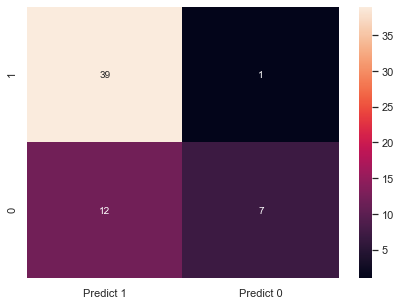

In [147]:
#confusion matrix
lg_cm=metrics.confusion_matrix(y_test,y_predicted, labels=[1, 0]) 

df_cm = pd.DataFrame(lg_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

### K-Nearest Neighbor

#### Hyperparameter Tuning

In [101]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.874912 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


#### Finding The best K

In [148]:

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)



The optimal number of neighbors is 7


In [149]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [152]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors =optimal_k,weights = 'distance',metric='manhattan' )

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
knn_accuracy_score=accuracy_score(y_test, y_pred)


print('KNN_Model Accuracy Score : {}'.format(knn_accuracy_score))



KNN_Model Accuracy Score : 0.847457627118644


In [153]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'accuracy': [knn_accuracy_score]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

Method  accuracy
0  Log Regression  0.779661
0             KNN  0.847458

In [154]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, y_pred))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.82      1.00      0.90        40

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59



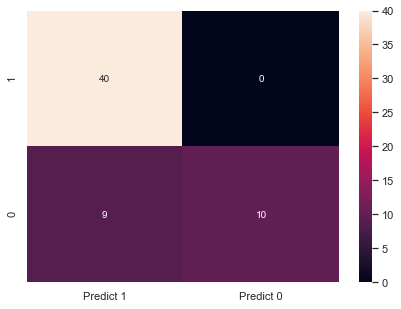

In [155]:
#confusion matrix
knn_cm=metrics.confusion_matrix(y_test,y_pred, labels=[1, 0]) 

df_knn_cm = pd.DataFrame(knn_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_knn_cm, annot=True,fmt='g')

### Naive Bayes

In [156]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_y_pred = nb_model.predict(X_test)
nb_score = nb_model.score(X_test, y_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)

print('NB_Model Accuracy Score : {}'.format(nb_accuracy))

NB_Model Accuracy Score : 0.6949152542372882


In [157]:
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'accuracy': [nb_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

Method  accuracy
0  Log Regression  0.779661
0             KNN  0.847458
0     Naive Bayes  0.694915

In [158]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, nb_y_pred))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.74      0.61        19
           1       0.84      0.68      0.75        40

    accuracy                           0.69        59
   macro avg       0.68      0.71      0.68        59
weighted avg       0.74      0.69      0.70        59



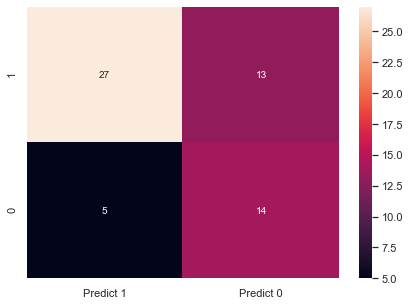

In [159]:
#confusion matrix
nb_cm=metrics.confusion_matrix(y_test, nb_y_pred, labels=[1, 0]) 

df_nb_cm = pd.DataFrame(nb_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_nb_cm, annot=True,fmt='g')




## Decision Tree

#### Hyperparameter Tuning

In [112]:
model = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3,4,5],'criterion':['gini','entropy']}
# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.859829 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [160]:
# invoking the decision tree classifier function

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1,max_depth=4,min_samples_leaf=3,min_samples_split=2)
dTree.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)

In [161]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9779411764705882
0.9152542372881356


In [162]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Parkinson_File, feature_names = list(columns))

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")
Image("parkinson.png")

Feature Importance for Decision Tree Classifier 


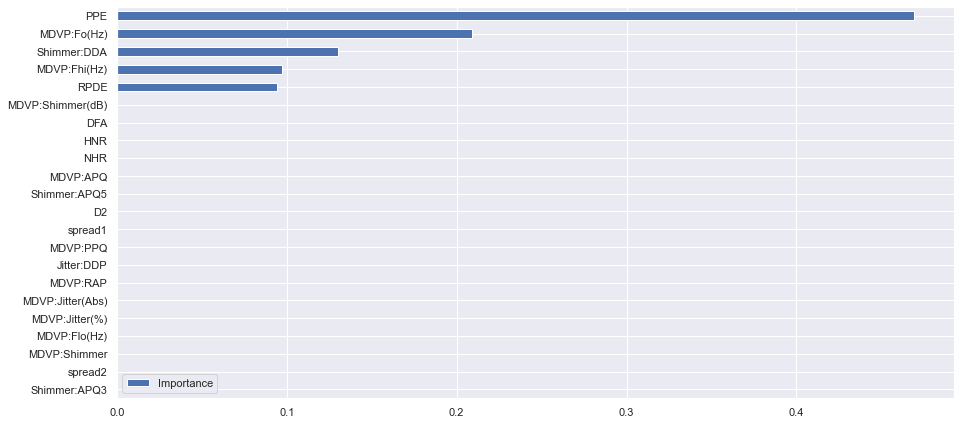

In [163]:
print('Feature Importance for Decision Tree Classifier '
     )
feature_importances = pd.DataFrame(dTree.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2));

### From the feature importance graph we can infer that PPE,MDVP:Fo(Hz),Shimmer:DDA, MDVP:Fhi(Hz)and RPDE  are the variables that impact the Disease status

In [164]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, y_pred))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.82      1.00      0.90        40

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59



Decision Tree Accuracy Score : 0.9152542372881356


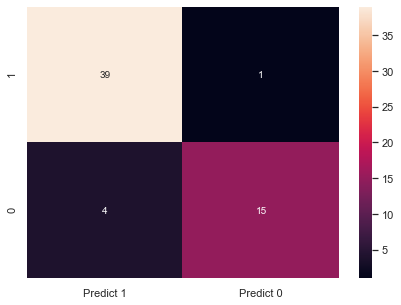

In [165]:
#confusion matrix

Dtree_accuracy=dTree.score(X_test , y_test)
print('Decision Tree Accuracy Score : {}'.format(Dtree_accuracy))
dt_y_predict = dTree.predict(X_test)

dt_cm=metrics.confusion_matrix(y_test, dt_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(dt_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [166]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [Dtree_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf


Method  accuracy
0  Log Regression  0.779661
0             KNN  0.847458
0     Naive Bayes  0.694915
0   Decision Tree  0.915254

## Training a Meta-Classifier Using Stacking

In [167]:
#taking KNN,Nave bayes and Logistic regression as a model and Decision Tree as Meta Classifier

In [168]:
from mlxtend.classifier import StackingClassifier

models=[knn,nb_model,lg]

sclf = StackingClassifier(classifiers=models, 
                          meta_classifier=dTree)

sclf.fit(X_train,y_train)
y_preds=sclf.predict(X_test)
stack_accuracy=accuracy_score(y_test,y_pred)
stack_accuracy


0.847457627118644

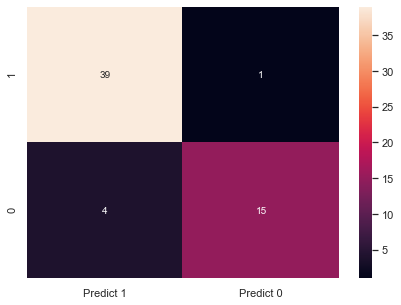

In [169]:
st_cm=metrics.confusion_matrix(y_test, dt_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(st_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [170]:
tempResultsDf = pd.DataFrame({'Method':['Stacking Classifier'], 'accuracy': [stack_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0       Log Regression  0.779661
0                  KNN  0.847458
0          Naive Bayes  0.694915
0        Decision Tree  0.915254
0  Stacking Classifier  0.847458

## Training Standard Ensemble Models

### Ensemble RandomForest Classifier

#### Hyperparameter Tuning

In [124]:
model = RandomForestClassifier()
n_estimators = [10, 100, 200,300]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.919231 using {'max_features': 'sqrt', 'n_estimators': 300}


In [171]:

rfcl = RandomForestClassifier(n_estimators = 300, max_features = 'sqrt')
rfcl = rfcl.fit(X_train, y_train)

In [172]:
rf_y_predict = rfcl.predict(X_test)
rf_acc=rfcl.score(X_test, y_test)
print('Random Forest Accuracy Score : {}'.format(rf_acc))
rf_cm=metrics.confusion_matrix(y_test, rf_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(rf_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

Random Forest Accuracy Score : 0.8305084745762712


In [173]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [rf_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0       Log Regression  0.779661
0                  KNN  0.847458
0          Naive Bayes  0.694915
0        Decision Tree  0.915254
0  Stacking Classifier  0.847458
0        Random Forest  0.830508

### Ensemble Learning - Bagging

#### Hyperparameter Tuning

In [128]:
model = BaggingClassifier()
n_estimators = [10, 100, 200, 300]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.897807 using {'n_estimators': 300}


In [174]:


bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=300,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Bagging Model Accuracy Score : 0.864406779661017


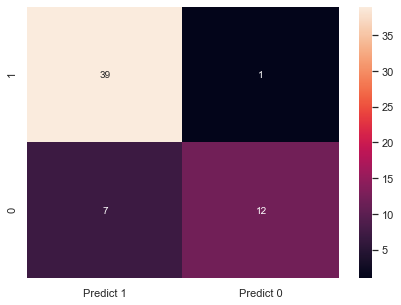

In [175]:
from sklearn.metrics import confusion_matrix

bg_y_predict = bgcl.predict(X_test)

bg_acc=bgcl.score(X_test , y_test)
print('Bagging Model Accuracy Score : {}'.format(bg_acc))
bg_cm=metrics.confusion_matrix(y_test, bg_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(bg_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [176]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [bg_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0       Log Regression  0.779661
0                  KNN  0.847458
0          Naive Bayes  0.694915
0        Decision Tree  0.915254
0  Stacking Classifier  0.847458
0        Random Forest  0.830508
0              Bagging  0.864407

### Ensemble Learning - AdaBoosting

#### Hyperparameter Tuning

In [132]:
model = AdaBoostClassifier()
n_estimators = [10, 50, 100, 200, 300]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.897368 using {'n_estimators': 300}


In [177]:

abcl = AdaBoostClassifier(n_estimators=300, random_state=1)

abcl = abcl.fit(X_train, y_train)

AdaBoostingModel Accuracy Score : 0.847457627118644


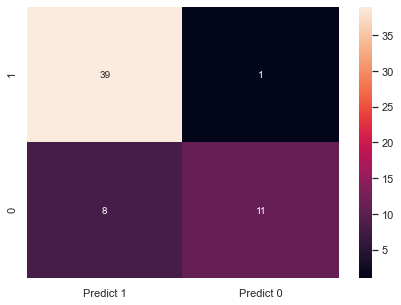

In [178]:
ab_y_predict = abcl.predict(X_test)
ab_acc=abcl.score(X_test , y_test)
print('AdaBoostingModel Accuracy Score : {}'.format(ab_acc))
ab_cm=metrics.confusion_matrix(y_test, ab_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(ab_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [179]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'accuracy': [ab_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0       Log Regression  0.779661
0                  KNN  0.847458
0          Naive Bayes  0.694915
0        Decision Tree  0.915254
0  Stacking Classifier  0.847458
0        Random Forest  0.830508
0              Bagging  0.864407
0          AdaBoosting  0.847458

###   Ensemble Learning - GradientBoost

#### Hyperparameter Tuning

In [136]:
model = GradientBoostingClassifier()
n_estimators = [10, 50, 100, 200, 300]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.919649 using {'n_estimators': 300}


In [180]:

gbcl = GradientBoostingClassifier(n_estimators = 300,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

Gradient Boost Model Accuracy Score : 0.8983050847457628


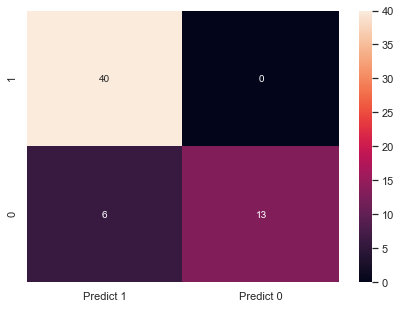

In [181]:
gb_y_predict = gbcl.predict(X_test)
gb_acc=gbcl.score(X_test, y_test)
print('Gradient Boost Model Accuracy Score : {}'.format(gb_acc))
gb_cm=metrics.confusion_matrix(y_test, gb_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(gb_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [182]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [gb_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0       Log Regression  0.779661
0                  KNN  0.847458
0          Naive Bayes  0.694915
0        Decision Tree  0.915254
0  Stacking Classifier  0.847458
0        Random Forest  0.830508
0              Bagging  0.864407
0          AdaBoosting  0.847458
0       Gradient Boost  0.898305

## Comparing all the models

In [140]:
models = []
models.append(('Logistic Regression',lg))
models.append(('KNeighbour',knn))
models.append(('Naive Bayes',nb_model))
models.append(('Decision Tree',dTree))
models.append(('Random Forest Classifier', rfcl))
models.append(('Bagging Classifier', bgcl))
models.append(('Ada Boosting Classifier',abcl))
models.append(('Gradient Boosting Classifier',gbcl))


from sklearn import model_selection

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for model_name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12000)
    scores = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(model_name)
    msg = "Model Name: %s, Mean of Accuracy : %f, Std of Accuracy: %f" % (model_name, scores.mean(), scores.std())
    print(msg)

Model Name: Logistic Regression, Mean of Accuracy : 0.835000, Std of Accuracy: 0.208537
Model Name: KNeighbour, Mean of Accuracy : 0.731316, Std of Accuracy: 0.170986
Model Name: Naive Bayes, Mean of Accuracy : 0.726053, Std of Accuracy: 0.215248
Model Name: Decision Tree, Mean of Accuracy : 0.728421, Std of Accuracy: 0.201022
Model Name: Random Forest Classifier, Mean of Accuracy : 0.783158, Std of Accuracy: 0.194317
Model Name: Bagging Classifier, Mean of Accuracy : 0.787895, Std of Accuracy: 0.197074
Model Name: Ada Boosting Classifier, Mean of Accuracy : 0.777895, Std of Accuracy: 0.183057
Model Name: Gradient Boosting Classifier, Mean of Accuracy : 0.772895, Std of Accuracy: 0.160953


In [183]:
resultsDf

Method  accuracy
0       Log Regression  0.779661
0                  KNN  0.847458
0          Naive Bayes  0.694915
0        Decision Tree  0.915254
0  Stacking Classifier  0.847458
0        Random Forest  0.830508
0              Bagging  0.864407
0          AdaBoosting  0.847458
0       Gradient Boost  0.898305

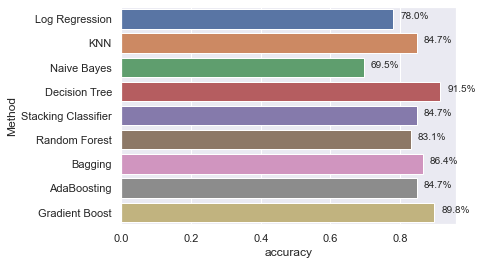

In [184]:

ax=sns.barplot(y="Method", x=("accuracy"),data=resultsDf)

total = len(resultsDf["accuracy"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Confusion Matrix

In [185]:
print('\nLogistic Regression: \n', lg_cm)
print('\nTrue Possitive    = ', lg_cm[0][0])
print('True Negative     = ',   lg_cm[1][1])
print('False Possive     = ',   lg_cm[0][1])
print('False Negative    = ',   lg_cm[1][0])


print('\nK-Nearest Neighbors: \n', knn_cm)
print('\nTrue Possitive    = ', knn_cm[0][0])
print('True Negative     = ',   knn_cm[1][1])
print('False Possive     = ',   knn_cm[0][1])
print('False Negative    = ',   knn_cm[1][0])


print('\nNaive Bayes: \n', nb_cm)
print('\nTrue Possitive    = ', nb_cm[0][0])
print('True Negative     = ',   nb_cm[1][1])
print('False Possive     = ',   nb_cm[0][1])
print('False Negative    = ',   nb_cm[1][0])

print('\nDecision Tree: \n', dt_cm)
print('\nTrue Possitive    = ', dt_cm[0][0])
print('True Negative     = ',   dt_cm[1][1])
print('False Possive     = ',   dt_cm[0][1])
print('False Negative    = ',   dt_cm[1][0])

print('\nStacking: \n', st_cm)
print('\nTrue Possitive    = ', st_cm[0][0])
print('True Negative     = ',   st_cm[1][1])
print('False Possive     = ',   st_cm[0][1])
print('False Negative    = ',   st_cm[1][0])

print('\nRandom Forest: \n', rf_cm)
print('\nTrue Possitive    = ', rf_cm[0][0])
print('True Negative     = ',   rf_cm[1][1])
print('False Possive     = ',   rf_cm[0][1])
print('False Negative    = ',   rf_cm[1][0])


print('\nBagging: \n', bg_cm)
print('\nTrue Possitive    = ', bg_cm[0][0])
print('True Negative     = ',   bg_cm[1][1])
print('False Possive     = ',   bg_cm[0][1])
print('False Negative    = ',   bg_cm[1][0])

print('\nAdaboost: \n', ab_cm)
print('\nTrue Possitive    = ', ab_cm[0][0])
print('True Negative     = ',   ab_cm[1][1])
print('False Possive     = ',   ab_cm[0][1])
print('False Negative    = ',   ab_cm[1][0])

print('\nGradient Boosting: \n', bg_cm)
print('\nTrue Possitive    = ', bg_cm[0][0])
print('True Negative     = ',   bg_cm[1][1])
print('False Possive     = ',   bg_cm[0][1])
print('False Negative    = ',   bg_cm[1][0])





Logistic Regression: 
 [[39  1]
 [12  7]]

True Possitive    =  39
True Negative     =  7
False Possive     =  1
False Negative    =  12

K-Nearest Neighbors: 
 [[40  0]
 [ 9 10]]

True Possitive    =  40
True Negative     =  10
False Possive     =  0
False Negative    =  9

Naive Bayes: 
 [[27 13]
 [ 5 14]]

True Possitive    =  27
True Negative     =  14
False Possive     =  13
False Negative    =  5

Decision Tree: 
 [[39  1]
 [ 4 15]]

True Possitive    =  39
True Negative     =  15
False Possive     =  1
False Negative    =  4

Stacking: 
 [[39  1]
 [ 4 15]]

True Possitive    =  39
True Negative     =  15
False Possive     =  1
False Negative    =  4

Random Forest: 
 [[39  1]
 [ 9 10]]

True Possitive    =  39
True Negative     =  10
False Possive     =  1
False Negative    =  9

Bagging: 
 [[39  1]
 [ 7 12]]

True Possitive    =  39
True Negative     =  12
False Possive     =  1
False Negative    =  7

Adaboost: 
 [[39  1]
 [ 8 11]]

True Possitive    =  39
True Negative     =

## CONCLUSIONS

- From the above results we find that :

## #Decision Tree has the best Accuracy score of 91.5% there for Decision Tree is the best model amoung all So we will Choose Decision Tree  for the Given data set of Parkinson’s Disease (PD) 
    
- Type I and Type II errors are least in Decision Tree

- Gradient boos is also having a High accuracy od 89.8%

- All the Ensemble Techniques are Having more accuracy  than the base models

- Minimum 300 trees were required in every ensemble model, which added to higher accuracy.

- Computation time was relatively less in Ensemble models

- Scaling of data also plays an important role

- Hypertuning of data in ensemble models takes very high computational time as they are having more than 500 trees to run.

- K-fold cross validation is giving a better idea of models as it is training the whole set.



